# LENDING CLUB CASE STUDY

> This project aims to leverage Exploratory Data Analysis (EDA) to improve loan approval decisions by accurately predicting the likelihood of applicants defaulting on loans. This involves analyzing a dataset of past loan applications to identify patterns associated with default risks.

## Table of Contents
* [General Info](#general-information)
* [Technologies Used](#technologies-used)
* [Data Preparation and Initial Assessment](#data-preparation-and-initial-asssessment)
* [Data Cleaning](#data-cleaning)
* [Exploratory Data Analysis (EDA)](#eda)
* [Conclusions](#conclusions)
* [Acknowledgements](#acknowledgements)

<a name="general-information"></a>
## General Information

This project aims to address the challenge of loan defaults in the lending industry, specifically for Lending Club, a major online loan marketplace. The focus is on improving loan approval processes by identifying patterns that predict the likelihood of applicants defaulting on their loans.

Background

This project is part of the MSc in AI & ML program, specifically within a statistics course. Lending Club faces significant financial risks from loan defaults. The objective of this project is to leverage data analysis to enhance the accuracy of loan approval decisions.

Business Problem

The primary business problem is the risk of financial loss due to loan defaults. By identifying 'risky' applicants who are likely to default, the project aims to minimize these losses. Accurate evaluation of loan applications is crucial for making informed decisions on whether to approve, reject, or adjust loan terms.

Dataset

The dataset used in this project `loan.csv` includes historical data on past loan applicants, covering their repayment history and loan outcomes. The key categories of loan outcomes are:
* Fully Paid: Loans that have been repaid in full.
* Current: Loans that are still being repaid.
* Charged-Off: Loans where the applicant has defaulted.



<a name="technologies-used"></a>
## Technologies used

* NumPy: For numerical computations.
* Pandas: For data manipulation and analysis.
* Matplotlib: For creating visualizations.
* Seaborn: For statistical data visualization.
* Warnings: To suppress warning messages.
* Python: The primary programming language used for this project.

In [2]:
# import libraries
# Numerical and Data Analysis
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Datetime libraries
import datetime

<a name="data-preparation-and-initial-asssessment"></a>
## Data preparation and initial asssessment

* Load and inspect the dataset for completeness and integrity.
* Assess initial data quality and structure to identify areas requiring cleaning or transformation.

In [3]:
# Set pandas display options to improve data visualization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# setting matlab options to improve plot visualiation
%matplotlib inline
plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.titlecolor'] = 'blue'
plt.rcParams['axes.titleweight'] = 'bold'

In [5]:
# Load dataset
loan_df = pd.read_csv('loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

<a name="data-cleaning"></a>
## Data cleaning
* Drop irrelevant, irreliable, or non-informative columns
* Handling Missing Values
* Standardizing data
* Handling Outliers
* Sanity checks


##### **Drop irrelevant, irreliable, or non-informative columns**

In [6]:
# Find columns with all rows having a single value, all unique values, or all NaN values
columnstodrop=loan_df.columns[(loan_df.nunique()==1) | (loan_df.nunique()==loan_df.shape[0]) | (loan_df.isna().sum()==loan_df.shape[0])]
loan_df[columnstodrop].head()

,id,member_id,pymnt_plan,url,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,n,https://lendingclub.com/browse/loanDetail.acti...,f,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,n,https://lendingclub.com/browse/loanDetail.acti...,f,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,n,https://lendingclub.com/browse/loanDetail.acti...,f,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,n,https://lendingclub.com/browse/loanDetail.acti...,f,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,n,https://lendingclub.com/browse/loanDetail.acti...,f,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [7]:
# Drop the irrelevant columns 'columnstodrop'
loan_df.drop(columns=columnstodrop,inplace=True)
loan_df.shape

(39717, 45)

In [8]:
# Find top columns with most rows having NaN
topnacols=(100 * loan_df.isna().sum()/loan_df.shape[0]).sort_values(ascending=False).head()
topnacols

next_pymnt_d             97.13
mths_since_last_record   92.99
mths_since_last_delinq   64.66
desc                     32.59
emp_title                 6.19
dtype: float64

In [9]:
# Drop columns with most rows having NaN
loan_df.drop(columns=topnacols.index[:4],inplace=True)
loan_df.shape

(39717, 41)

In [10]:
#Drop Investor columns as they are not relavant in this case study
invcols=['funded_amnt_inv','out_prncp_inv','total_pymnt_inv']
loan_df.drop(columns=invcols,inplace=True)
loan_df.shape

(39717, 38)

In [11]:
#Find and remove other columns that are not relavant to this case study
colswithnoaddedvalue=['emp_title','title','zip_code','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
loan_df.drop(columns=colswithnoaddedvalue,inplace=True)
loan_df.shape

(39717, 24)

In [12]:
#Drop rows which are having Loan Status 'Current' as they can either move to 'Full Paid' Or 'Charged Off'
loan_df=loan_df[-(loan_df.loan_status=="Current")]
loan_df.shape

(38577, 24)

In [13]:
# show summary of cleaned loan_df
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

##### **Handling Missing Values**

In [14]:
# Analyze emp_length, revol_util and pub_rec_bankruptcies to determine the best value for imputing nulls
print(loan_df.emp_length.value_counts())
print("_" * 20)
print(loan_df.revol_util.value_counts())
print("_" * 20)
print(loan_df.pub_rec_bankruptcies.value_counts())

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64
____________________
revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64
____________________
pub_rec_bankruptcies
0.00    36238
1.00     1637
2.00        5
Name: count, dtype: int64


We can use the mode for emp_length (10+ years), revol_util (0%), and pub_rec_bankruptcies (0.0) because, in each case, the mode appears significantly more frequently than the next most common value, making it the most representative and reliable estimate for imputation. Helps in retaining current distribution of data.

In [15]:
# Fill the null values with mode values
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            38577 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

##### **Standardizing data**
Now let's make sure all the values have the right format:

In [16]:
# Remove the '%' sign from values in the int_rate column and convert them to float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: str(x).replace("%", "")).astype('float64')

# Convert emp_length values to integers: '<1 year' to 0, '10+ years' to 10, and others to their leading digit
loan_df.emp_length = loan_df.emp_length.apply(lambda x: 0 if '<' in str(x) else (10 if '10' in str(x) else str(x)[0])).astype('int')

# Remove the '%' sign from values in the revol_util column and convert them to float
loan_df.revol_util = loan_df.revol_util.apply(lambda x: str(x).replace("%", "")).astype('float64')

# Convert the issue_d (issue date) column to datetime format with the specified format '%b-%y' (MMM-YY)
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')

# Convert the earliest_cr_line column to datetime format with the specified format '%b-%y'
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.earliest_cr_line = loan_df.earliest_cr_line.mask(loan_df.earliest_cr_line.dt.year > datetime.datetime.now().year,loan_df.earliest_cr_line - pd.DateOffset(years=100)) #Handling 19YY

#Find categorical columns and remove any leading/trailing spaces (like ' 36 months' to '36 months' in term column)
catcols=loan_df.select_dtypes(include=['object']).columns
loan_df[catcols] =loan_df[catcols].apply(lambda x: x.str.strip())

In [17]:
#Since verified and source verified is the same thing for our purposes, bundle them to Verified.
print('Before Change\n',loan_df.verification_status.value_counts())
loan_df.verification_status=loan_df.verification_status.apply(lambda x: "Verified" if x=="Source Verified" else x)
print('\nAfter Change\n',loan_df.verification_status.value_counts())

Before Change
 verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

After Change
 verification_status
Verified        21883
Not Verified    16694
Name: count, dtype: int64


In [18]:
# Info after transformations
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   term                  38577 non-null  object        
 3   int_rate              38577 non-null  float64       
 4   installment           38577 non-null  float64       
 5   grade                 38577 non-null  object        
 6   sub_grade             38577 non-null  object        
 7   emp_length            38577 non-null  int64         
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  object        
 13  purpose              

##### **Handling Outliers**

In [19]:
#Identify numerical data columns
numcols=loan_df.select_dtypes(include=['int32','int64','float64']).columns
numcols

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

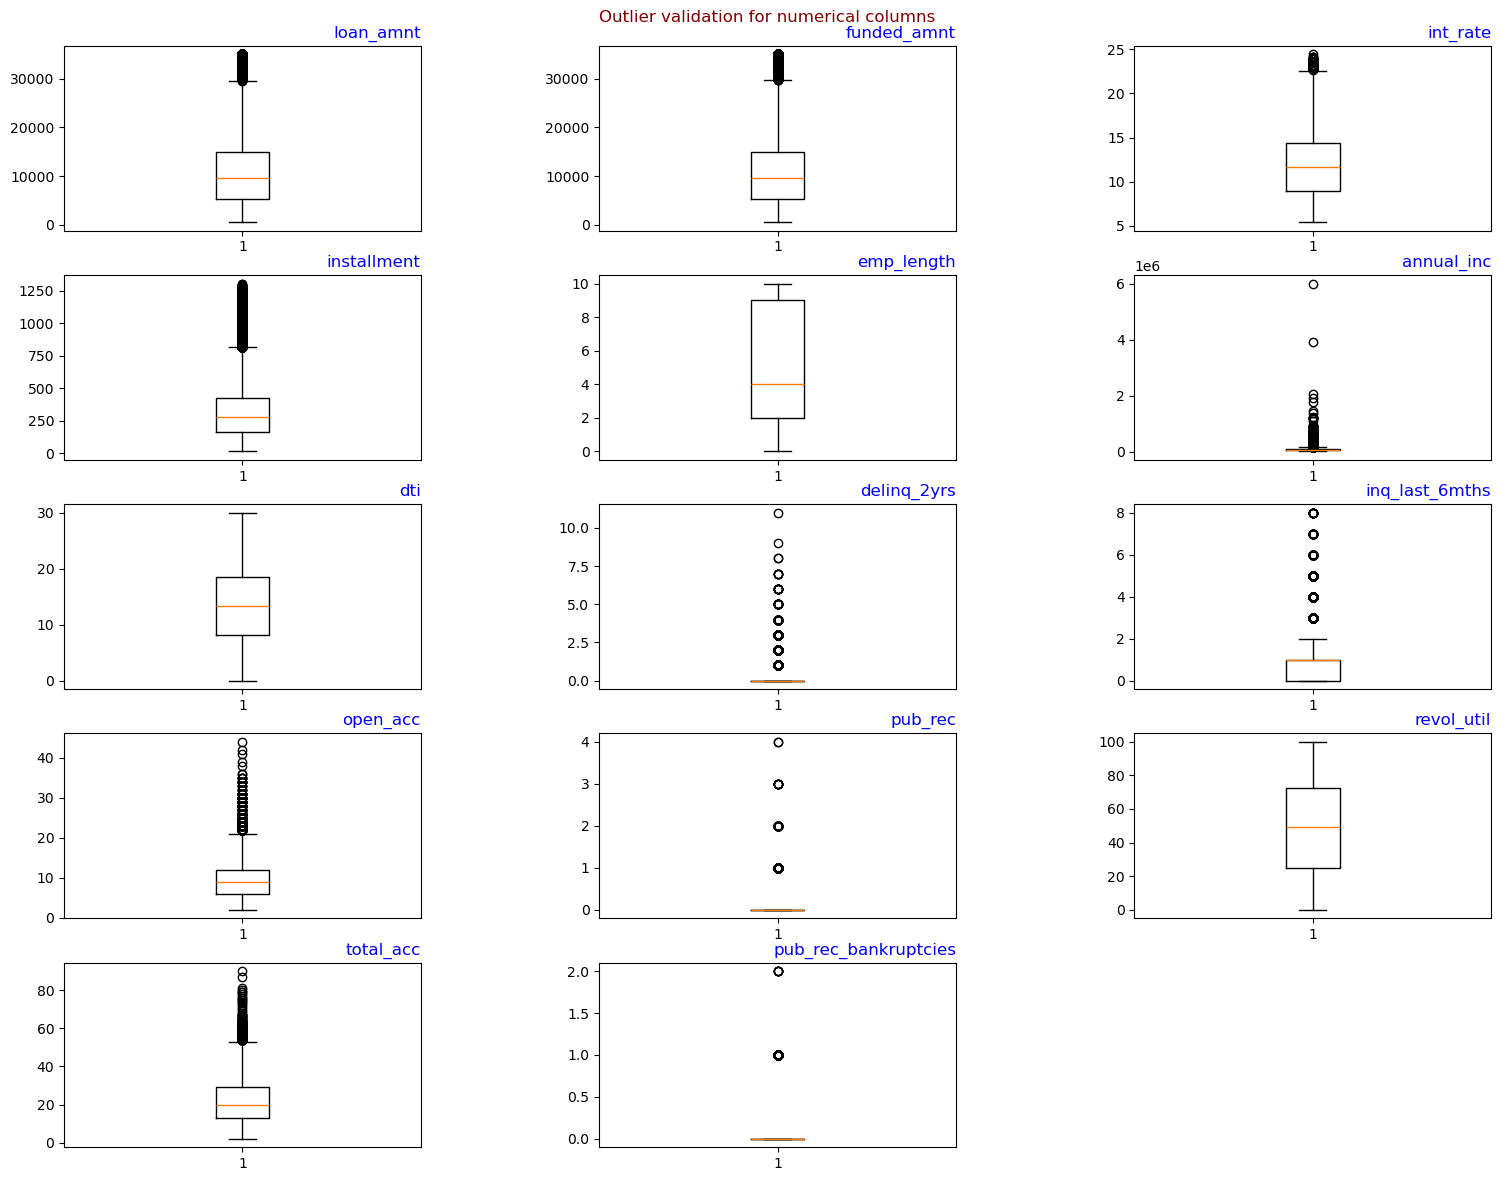

In [20]:
#Plot all numerical columns to identify any outliers
fig, axes = plt.subplots(5, 3, figsize=(15, 12))

fig.suptitle('Outlier validation for numerical columns\n',color='maroon')
fig.tight_layout()
fig.subplots_adjust(wspace=.5,top=0.95)

for i,col_name in enumerate(numcols):
    ax = axes[i // 3, i % 3]
    ax.boxplot(loan_df[col_name])
    ax.set_title(col_name, weight='light', fontsize=12,loc='right')
axes[4,2].set_axis_off()

###### Outlier in Annual Income

In [21]:
#From above boxplots, clear indication that annual income column have high outliers
print('Finding outliers in annual income column\n')

upperfence=loan_df.annual_inc.quantile(.75)+1.5*loan_df.annual_inc.quantile(.50)
print('  Upperfence : ',upperfence, ' -----> ', loan_df[(loan_df.annual_inc > upperfence)].shape[0])

print('\nHigh outlier records based on upper fence')
loan_df[(loan_df.annual_inc > upperfence)].head()

Finding outliers in annual income column

  Upperfence :  170302.0  ----->  1047

High outlier records based on upper fence


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
170,25000,25000,36 months,12.42,835.39,B,B4,2,RENT,225000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,NJ,8.32,1,2004-07-01,0,11,0,34.60,23,0.00
336,35000,23150,60 months,17.27,578.71,D,D3,8,MORTGAGE,208000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,MD,7.94,0,1993-02-01,0,11,0,23.50,79,0.00
392,5000,5000,36 months,6.62,153.52,A,A2,1,RENT,276000.00,Verified,2011-12-01,Fully Paid,debt_consolidation,FL,1.82,0,2004-06-01,0,7,0,56.00,18,0.00
567,2000,2000,36 months,9.91,64.45,B,B1,1,MORTGAGE,231252.00,Verified,2011-12-01,Fully Paid,other,GA,11.43,0,1980-03-01,0,19,0,93.50,43,0.00
717,28000,28000,36 months,15.96,983.85,C,C5,5,MORTGAGE,235000.00,Verified,2011-12-01,Fully Paid,credit_card,VA,9.08,0,1994-07-01,1,10,0,82.70,27,0.00


In [22]:
#Checking for annual income data continuity
dict(loan_df.annual_inc.quantile([.95,0.96,0.97,0.98,0.99,0.995,0.997,0.998,0.999]))

{0.95: 140004.0,
 0.96: 150000.0,
 0.97: 165000.0,
 0.98: 187000.0,
 0.99: 234143.99999999878,
 0.995: 300000.0,
 0.997: 360000.0,
 0.998: 475439.9999999441,
 0.999: 700000.0}

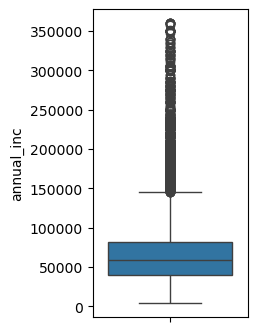

In [23]:
#Noticed continuity in data till 99.7%, so choosing this as threshold to remove outlier rows
plt.figure(figsize=(2, 4))
loan_df=loan_df[~(loan_df.annual_inc > loan_df.annual_inc.quantile(.997))]
sns.boxplot(loan_df.annual_inc)
plt.show()

###### Outlier in Other Columns

In [24]:
#Outliers in other columns seem to be genuine as we see continuity in data
print('delinq_2yrs          : ', list(map(lambda x: x, loan_df.delinq_2yrs.value_counts().sort_index().index)))
print('open_acc             : ', list(map(lambda x: x, loan_df.open_acc.value_counts().sort_index().index)))
print('pub_rec              : ', list(map(lambda x: x, loan_df.pub_rec.value_counts().sort_index().index)))
print('pub_rec_bankruptcies : ', list(map(lambda x: x, loan_df.pub_rec_bankruptcies.value_counts().sort_index().index)))

delinq_2yrs          :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
open_acc             :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 44]
pub_rec              :  [0, 1, 2, 3, 4]
pub_rec_bankruptcies :  [0.0, 1.0, 2.0]


##### **Sanity checks**

In [25]:
#Check if any other invalid data rows by comparing data values logically
print("Issue Date before eariest credit line date : ", (loan_df['issue_d'] < loan_df['earliest_cr_line']).sum())
print("Open accounts greater than total accounts  : ", (loan_df['open_acc'] > loan_df['total_acc']).sum())

Issue Date before eariest credit line date :  0
Open accounts greater than total accounts  :  1


In [26]:
# There's one record where open accounts > total accounts which doesnt make logical sense, so we remove it.
loan_df = loan_df[loan_df['open_acc'] <= loan_df['total_acc']]

##### **Data after cleanup**

In [27]:
# Reindex after data cleaning
loan_df.reindex
loan_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,83.70,9,0.00
1,2500,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,9.40,4,0.00
2,2400,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,98.50,10,0.00
3,10000,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,21.00,37,0.00
5,5000,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0,28.30,12,0.00


In [28]:
# Info after data cleaning
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38464 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38464 non-null  int64         
 1   funded_amnt           38464 non-null  int64         
 2   term                  38464 non-null  object        
 3   int_rate              38464 non-null  float64       
 4   installment           38464 non-null  float64       
 5   grade                 38464 non-null  object        
 6   sub_grade             38464 non-null  object        
 7   emp_length            38464 non-null  int64         
 8   home_ownership        38464 non-null  object        
 9   annual_inc            38464 non-null  float64       
 10  verification_status   38464 non-null  object        
 11  issue_d               38464 non-null  datetime64[ns]
 12  loan_status           38464 non-null  object        
 13  purpose              

<a name="eda"></a>
## Exploratory Data Analysis
* Summary statistics
* Univariate analysis
* Bivariate analysis

##### **Summary statistics:**

In [29]:
# Get summary statistics for numerical columns
loan_df.describe()

,loan_amnt,funded_amnt,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,38464.00,38464.00,38464.00,38464.00,38464.00,38464.00,38464,38464.00,38464.00,38464,38464.00,38464.00,38464.00,38464.00,38464.00,38464.00
mean,11029.40,10767.34,11.93,321.93,5.07,66848.19,2010-10-26 06:13:01.697171200,13.30,0.15,1997-02-07 13:59:05.341098240,0.87,9.27,0.06,48.66,22.03,0.04
min,500.00,500.00,5.42,15.69,0.00,4000.00,2007-06-01 00:00:00,0.00,0.00,1946-01-01 00:00:00,0.00,2.00,0.00,0.00,2.00,0.00
25%,5300.00,5168.75,8.94,165.74,2.00,40000.00,2010-05-01 00:00:00,8.17,0.00,1993-12-01 00:00:00,0.00,6.00,0.00,25.10,13.00,0.00
50%,9600.00,9500.00,11.71,277.54,4.00,58500.00,2011-01-01 00:00:00,13.39,0.00,1998-06-01 00:00:00,1.00,9.00,0.00,49.10,20.00,0.00
75%,15000.00,15000.00,14.38,424.80,9.00,82000.00,2011-08-01 00:00:00,18.57,0.00,2001-09-01 00:00:00,1.00,12.00,0.00,72.30,29.00,0.00
max,35000.00,35000.00,24.40,1305.19,10.00,360000.00,2011-12-01 00:00:00,29.99,11.00,2008-11-01 00:00:00,8.00,44.00,4.00,99.90,90.00,2.00
std,7328.69,7070.90,3.69,207.96,3.60,39547.31,NaN,6.66,0.49,NaN,1.07,4.40,0.24,28.39,11.41,0.20


Since this seems reasonable, we can now move on to the analysis of the data.

##### **Univariate analysis**

###### **Distrubution analysis of key data columns**

In [30]:
#Create function that can be used for plotting distrubution of data columns
def plotunivariate(plotvar,friendlytext,plotpie=False):
    global fignum
    fignum=fignum+1
    plt.subplot(fignum)
    if plotpie:
      loan_df[plotvar].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=(0.1,0),textprops={'fontsize': 12, 'fontweight' : 15, 'color' : 'Black'})
    else:
      loan_df[plotvar].value_counts().sort_index().plot(kind='bar',color=['#ff99ab', '#a3b899', '#cbbeb5', '#ffc3a0', '#52b3b6','#9db8e7']) 
        
    ax.set_ylabel('Count')
    ax.set_xlabel(friendlytext)        
    plt.xticks(fontsize=8,rotation=90)    
    plt.title('Distribution of ' + friendlytext)

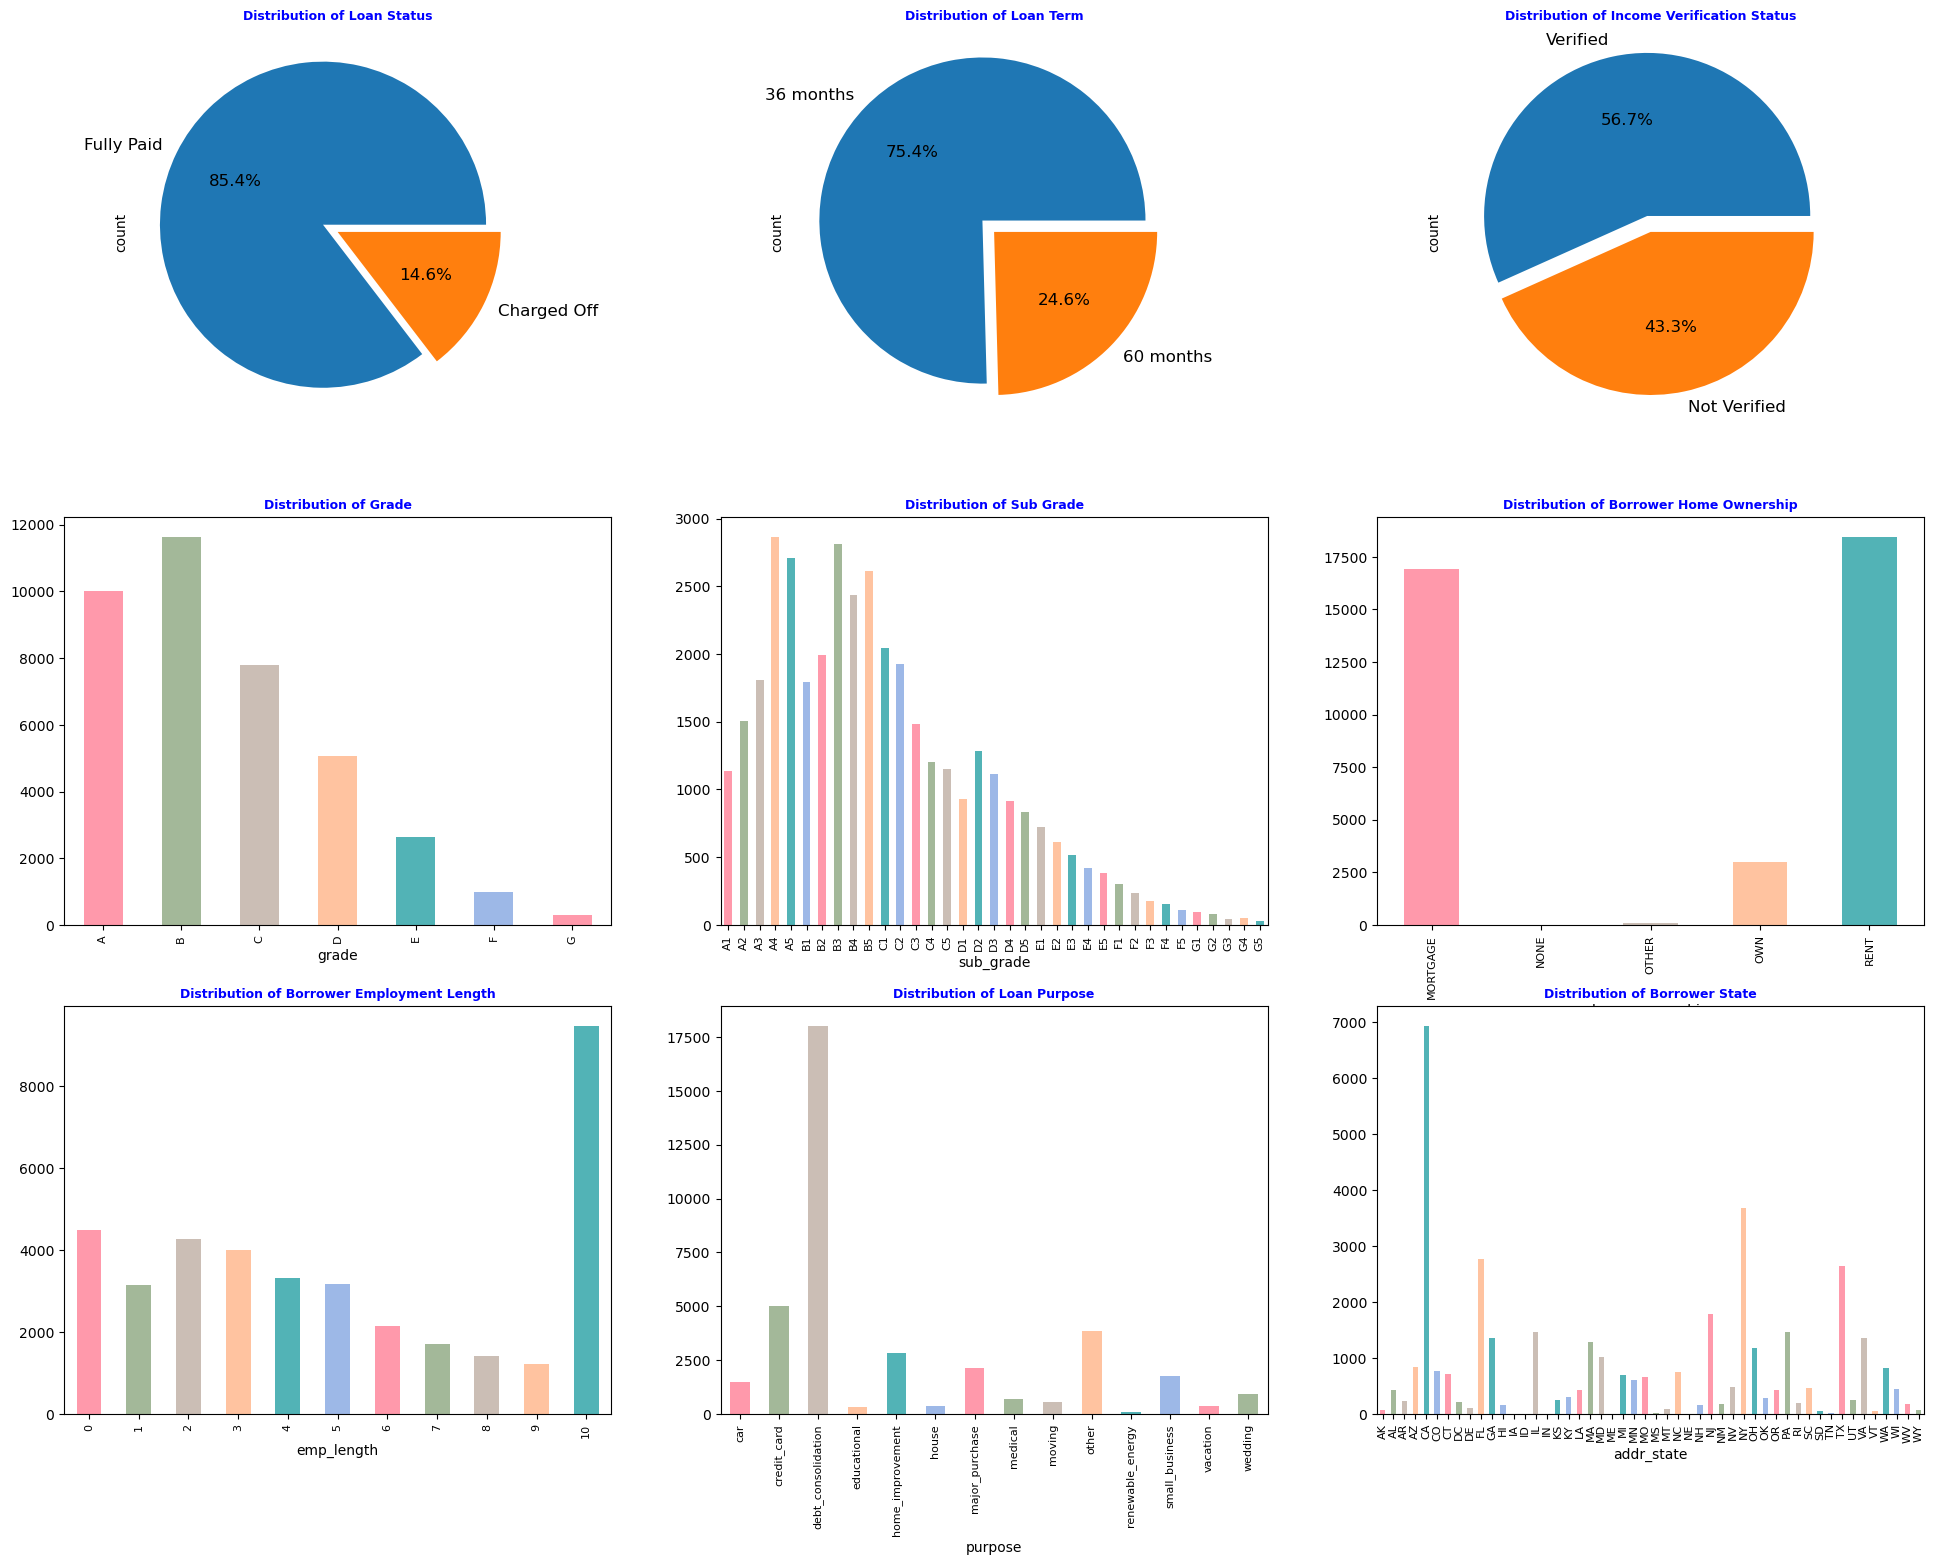

In [31]:
#Plot key data columns
fignum=330
plt.figure(figsize=(24, 18))
plotunivariate('loan_status','Loan Status',True)
plotunivariate('term','Loan Term',True)
plotunivariate('verification_status','Income Verification Status',True)
plotunivariate('grade','Grade')
plotunivariate('sub_grade','Sub Grade')
plotunivariate('home_ownership','Borrower Home Ownership')
plotunivariate('emp_length','Borrower Employment Length')
plotunivariate('purpose','Loan Purpose')
plotunivariate('addr_state','Borrower State')    
#plt.savefig('Univariate_01.jpeg')             
plt.show()                                                                                                     #Tip: Double click to expand below plots

**Insights:**
* <span style="color: DarkCyan;font-size: 11px">**Loan Status:**</span> The pie chart shows that <span style="color: blue;">85.4%</span> of loans are <span style="color: blue;">fully paid</span>, while <span style="color: blue;">14.6%</span> are <span style="color: blue;">charged off</span>. This indicates a <span style="text-decoration: underline">*relatively low default rate*</span>, which is positive for the lending platform.

* <span style="color: DarkCyan;font-size: 11px">**Loan Term:**</span>  <span style="color: blue;">75.4%</span> of loans have a <span style="color: blue;">36-month</span> term, while <span style="color: blue;">24.6%</span> have a <span style="color: blue;">60-month</span> term. <span style="text-decoration: underline">*Shorter-term loans are significantly more common*</span>, possibly due to lower risk or borrower preference.

* <span style="color: DarkCyan;font-size: 11px">**Income Verification Status:**</span> <span style="color: blue;">56.7%</span> of borrowers have <span style="color: blue;">verified income</span>, while <span style="color: blue;">43.3%</span> are <span style="color: blue;">not verified</span>. This suggests that the platform accepts a <span style="text-decoration: underline">*substantial number of loans without income verification*</span>.

* <span style="color: DarkCyan;font-size: 11px">**Grade:**</span> Loans are <span style="color: blue;">graded from A to G, with B being the most common, followed by A and C</span>. This <span style="text-decoration: underline">*indicates a concentration in higher-quality loans*</span> according to the platform's risk assessment.

* <span style="color: DarkCyan;font-size: 11px">**Sub Grade:**</span> The sub-grades show a more granular risk assessment, with </span> <span style="color: blue;">A4, A5, B3, B4, and B5 being the most common</span>. This <span style="text-decoration: underline">*reflects a nuanced approach to risk categorization*</span>.

* <span style="color: DarkCyan;font-size: 11px">**Borrower Home Ownership:**</span> <span style="color: blue;">Most borrowers are renters</span>, followed by those who own homes. Mortgage holders are the smallest group, suggesting a <span style="text-decoration: underline">*diverse range of borrower housing situations*</span>.

* <span style="color: DarkCyan;font-size: 11px">**Borrower Employment Length:**</span> There's a <span style="color: blue;">significant spike at the "10+"</span> years category, indicating many long-term employed borrowers. <span style="text-decoration: underline">*Other categories are more evenly distributed*</span>.

* <span style="color: DarkCyan;font-size: 11px">**Loan Purpose:**</span> <span style="color: blue;">Debt consolidation</span> is overwhelmingly the <span style="color: blue;">most common loan purpose</span>, followed by credit card payoff. This suggests <span style="text-decoration: underline">*many borrowers are using loans to manage existing debt*</span>.

* <span style="color: DarkCyan;font-size: 11px">**Borrower State:**</span> <span style="color: blue;">California (CA)</span> has the </span> <span style="color: blue;">highest number of borrowers, </span> <span style="color: blue;">followed by New York (NY) and Texas (TX)</span>. This <span style="text-decoration: underline">*likely reflects population density and economic activity in these states*</span>.

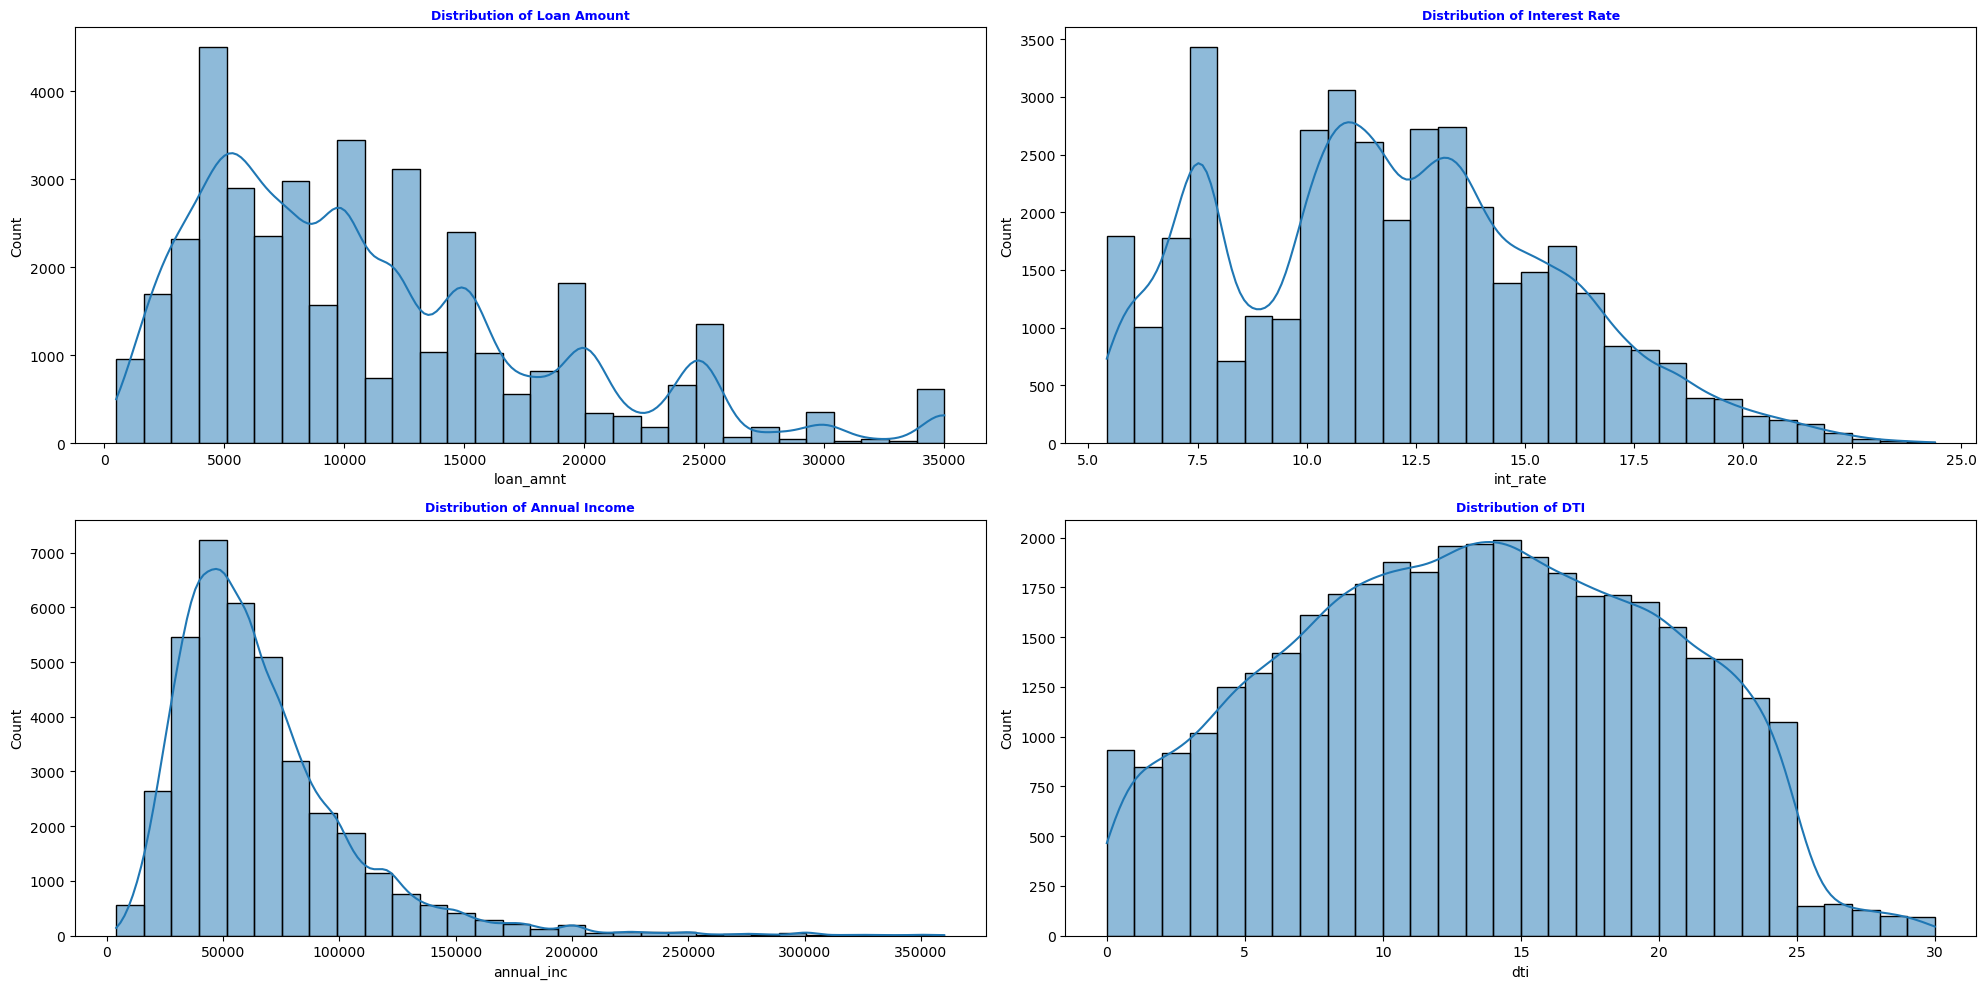

In [32]:
#Distribution plot for key numerical data columns
plt.figure(figsize=(20, 10))

# Loan Amount
plt.subplot(221)
sns.histplot(data=loan_df,x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount')

# Interest Rate
plt.subplot(222)
sns.histplot(data=loan_df,x='int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate')

# Annual Income
plt.subplot(223)
sns.histplot(data=loan_df,x='annual_inc', bins=30, kde=True)
plt.title('Distribution of Annual Income')

# Debt-to-Income Ratio
plt.subplot(224)
sns.histplot(data=loan_df,x='dti', bins=30, kde=True)
plt.title('Distribution of DTI')
#plt.savefig('Univariate_02.jpeg') 
plt.tight_layout()
plt.show()


**Insights:**
* <span style="color: DarkCyan;font-size: 11px;">**Loan Amount:** </span>The <span style="color: blue;">majority</span> of loan amounts applied for by borrowers are concentrated <span style="color: blue;">between 4K and 10K dollars</span>, with a notable peak around $5,000. This indicates that <span style="text-decoration: underline">*most borrowers prefer moderate loan amounts*</span> rather than very high or low amounts.

* <span style="color: DarkCyan;font-size: 11px;">**Interest Rate:**</span>Interest rates exhibit a roughly normal distribution with <span style="color: blue;">peaks around 11%</span>. This suggests that most loans are offered within this interest rate range, which could be a common range set by the lending policies.

* <span style="color: DarkCyan;font-size: 11px;">**Annual Income:**</span>Annual incomes are <span style="color: blue;">right-skewed</span>, indicating that a <span style="text-decoration: underline">*significant portion of the borrowers report incomes below $100,000*</span>. Higher incomes are less common, which might reflect the target demographic of the lending club focusing on middle-income earners.

* <span style="color: DarkCyan;font-size: 11px;">**DTI (Debt-to-Income Ratio):**</span>The DTI ratio is <span style="color: blue;">evenly distributed with a peak around 15%</span>, suggesting that <span style="text-decoration: underline">*many borrowers have a moderate level of debt compared to their income*</span>. This ratio is crucial for assessing borrowers' ability to manage additional debt obligations.

###### **Derived Metrics**
* Loan Year: Derive loan issued year from issue_d (Issue Date) to anlayze if significant difference between years
* Loan Month: Derive loan issued month from issue_d (Issue Date) to anlayze if significant difference between months
* Credit Line Age: Calculate age of borrowers credit line in years as this is one of factors usualiy considered by lending companies

In [33]:
# Extract the year from the issue_d column and create a new column loan_year
loan_df['loan_year']=loan_df['issue_d'].dt.year

# Extract the month from the issue_d column and create a new column loan_month
loan_df['loan_month']=loan_df['issue_d'].dt.month

# Derive Credit Line Age in years
loan_df['credit_line_age'] = loan_df['loan_year'] - loan_df['earliest_cr_line'].dt.year


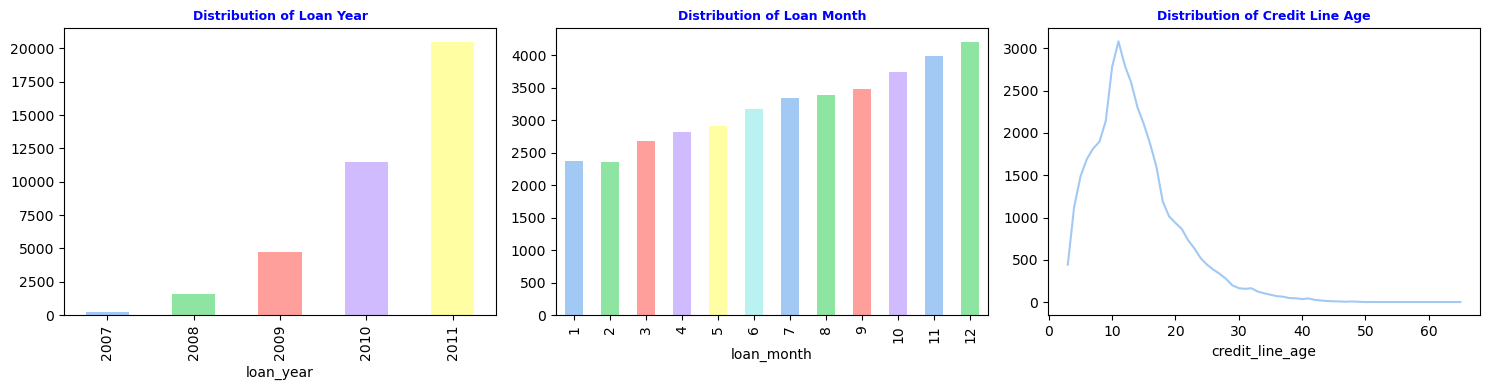

In [34]:
#Plotting derived metrics
plt.figure(figsize=(15, 4))

# Loan Year
plt.subplot(131)
loan_df['loan_year'].value_counts().sort_index().plot(kind='bar',color=sns.color_palette("pastel6",10))
plt.title('Distribution of Loan Year')

# Loan Year
plt.subplot(132)
loan_df['loan_month'].value_counts().sort_index().plot(kind='bar',color=sns.color_palette("pastel6",10))
plt.title('Distribution of Loan Month')

# Loan Year
plt.subplot(133)
loan_df['credit_line_age'].value_counts().sort_index().plot(kind='line',color=sns.color_palette("pastel6",10))
plt.title('Distribution of Credit Line Age')

#plt.savefig('Derived_01.jpeg')
plt.tight_layout()
plt.show()


**Insights:**
* <span style="color: DarkCyan;font-size: 11px;">**Loan Year:**</span> The bar chart shows a <span style="color: blue;">significant increase</span> in the number of loans issued <span style="color: blue;">from 2007 to 2011, with 2011 having the highest number of loans by far</span>. This trend <span style="text-decoration: underline">*indicates rapid growth in loan issuance over these years*</span>, possibly reflecting an expansion in market reach or changes in lending policies that made more capital available or more borrowers eligible. 

* <span style="color: DarkCyan;font-size: 11px;">**Loan Month:**</span> The distribution of loans shows a <span style="color: blue;">clear seasonal pattern throughout the year</span>. Loan numbers are <span style="color: blue;">lowest in January and February</span>, then gradually increase with the <span style="color: blue;">highest</span> number of loans occurring <span style="color: blue;">in December</span> (month 12). This year-end surge could be attributed to holiday-related borrowing or end-of-year financial decisions. <span style="text-decoration: underline">*The range spans from about 2,400 loans in January to over 4,000 in December, indicating significant monthly variation that Lending Club should consider in their operational planning and risk assessment strategies*</span>.

* <span style="color: DarkCyan;font-size: 11px;">**Credit Line Age:**</span> The distribution of credit line age displays a pronounced <span style="color: blue;">right-skewed pattern with a peak occurring sharply between 10 and 15 years</span>. This peak suggests that the most common credit history length for borrowers is within this range, indicating a typical duration after which many may settle their debts or choose to refinance. <span style="text-decoration: underline">*The rapid increase from 0 to 10 years highlights that many borrowers are relatively new to credit, with a gradual decline observed post-peak*</span>. This decline into a long tail extending up to about 60 years reflects a smaller group of borrowers with very established credit histories. 

###### **Segmented Univariate Analysis:**
* Analyze critical variables like Loan Amount, Interest Rate, Debit to Income Ratio, Revolving Utilization

In [35]:
# Derive bins for segmented analysis
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000,25000,30000,35000, float('Inf')], labels=['<5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K','25K-30K','30K-35K','>35k'])
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins=[0, 5, 10, 15, 20,25, float('Inf')], labels=['<5%', '5%-10%', '10%-15%', '15%-20%', '20%-25%','>25%'])
loan_df['dti_range'] = pd.cut(loan_df['dti'], bins=[0, 5, 10, 15, 20,25,30, float('Inf')], labels=['0-5', '5-10', '10-15', '15-20', '20-25','25-30','>30'])
loan_df['revol_util_range'] = pd.cut(loan_df['revol_util'], bins=[0,15, 30, 45, 60,75,90, float('Inf')], labels=['0-15%', '15%-30%', '30%-45%', '45%-60%', '60%-75%','75%-90%','>90%'])

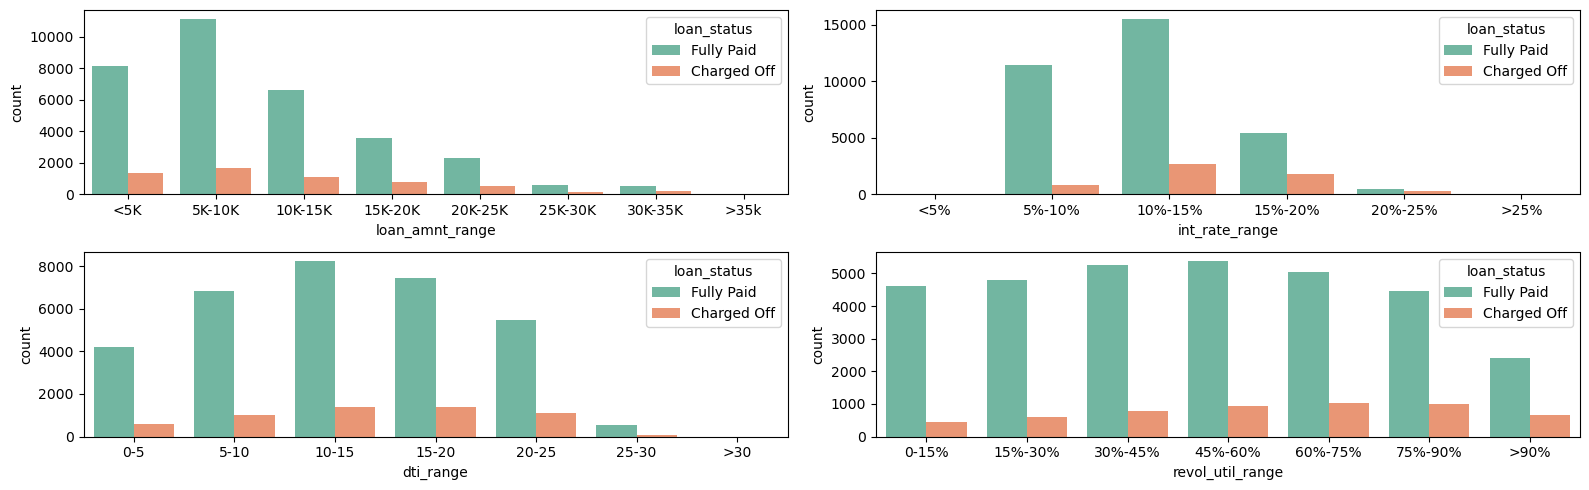

In [36]:
# Plot segmented data columns
plt.figure(figsize=(16, 5))
plt.subplot(221)
sns.countplot(x='loan_amnt_range', data=loan_df,hue='loan_status',palette='Set2')
plt.subplot(222)
sns.countplot(x='int_rate_range', data=loan_df,hue='loan_status',palette='Set2')
plt.subplot(223)
sns.countplot(x='dti_range', data=loan_df,hue='loan_status',palette='Set2')
plt.subplot(224)
sns.countplot(x='revol_util_range', data=loan_df,hue='loan_status',palette='Set2')
#plt.savefig('Segmented_01.jpeg')
plt.tight_layout()
plt.show()

**Insights:**

* <span style="color: blue;">Majority of loans issued for amount ranging $5K-10K</span>. Fully paid loans outnumber charged off loans across all ranges, but the proportion of charged off loans slightly increases for higher loan amounts. This suggests a <span style="text-decoration: underline">*potential higher risk associated with larger loans*</span>.

* <span style="color: blue;">The 10%-15% interest rate range is most prevalent, followed by 5%-10%</span>. As interest rates increase, the number of loans decreases. Notably, the <span style="text-decoration: underline">*proportion of charged off loans rises with higher interest rates*</span>, indicating a correlation between higher rates and increased default risk.

* <span style="color: blue;">Debit to Income Ratio distribution peaks in the 10%-15% range, with a fairly even spread across 0%-25%</span>. Fully paid loans consistently outnumber charged off loans. 

* <span style="color: blue;">Revolving Utilization distribution is relatively even across 0-60% ranges, dropping for ranges above 60%</span>. The <span style="text-decoration: underline">*proportion of charged off loans increases noticeably with higher revolving utilization, especially above 60%*</span>. This implies that higher revolving utilization rates may be associated with increased loan default risk, potentially making it an important factor in loan approval decisions.

##### **Bivariate analysis**
Analyze correlation between various data variables

###### Loan Status vs amount columns

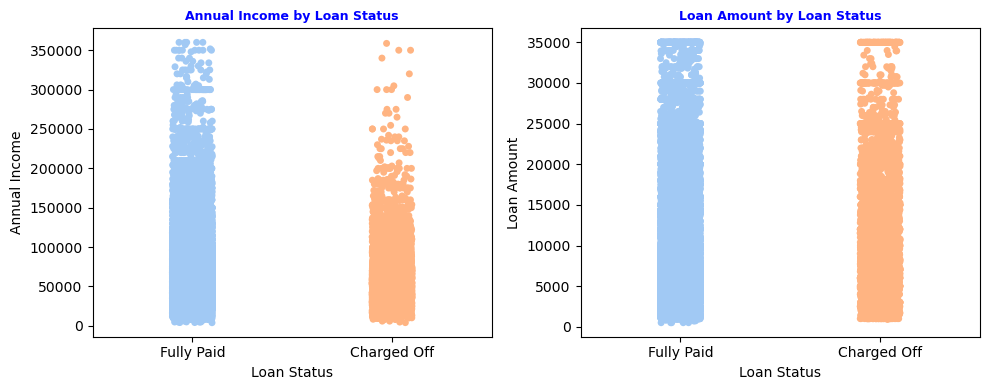

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.stripplot(x="loan_status",y="annual_inc",data=loan_df,palette="pastel")
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title("Annual Income by Loan Status")
plt.subplot(122)
sns.stripplot(x="loan_status",y="loan_amnt",data=loan_df,palette="pastel")
plt.ylabel('Loan Amount')
plt.xlabel('Loan Status')
plt.title("Loan Amount by Loan Status")
#plt.savefig('Bivariate_01.jpeg')
plt.tight_layout()
plt.show()

**Insights:**
* <span style="color: blue;">Higher-income borrowers are more likely to fully repay loans </span>, possibly due to greater financial stability and resources.
* Loan amounts are similarly distributed for both repaid and defaulted loans, but there's a <span style="color: blue;">slight tendency for higher default rates on larger loans</span>. This suggests that income is a stronger predictor of repayment than loan amount.

###### Interest Rate vs other columns

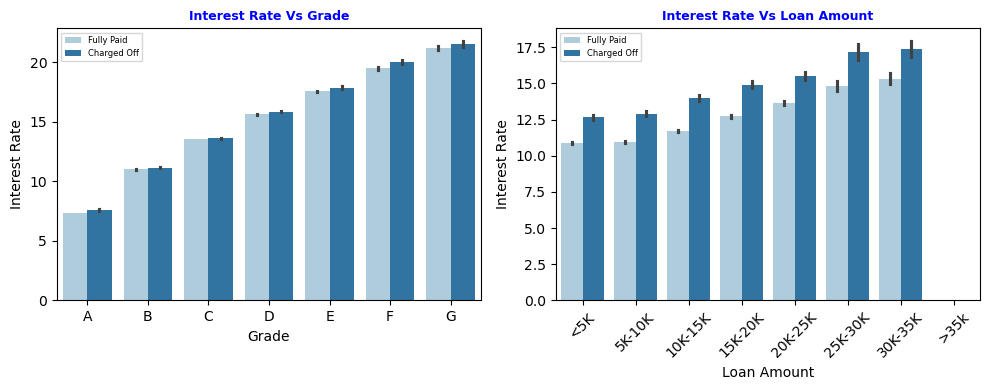

In [38]:
# Plot to analyse correlation between Interest Rate vs Grade, Loan amount by Loan Status
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.barplot(x="grade",y="int_rate",data=loan_df,order=['A','B','C','D','E','F','G'],hue='loan_status',palette="Paired")
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.legend(loc='upper left',fontsize=6,title='')
plt.title("Interest Rate Vs Grade")
plt.subplot(122)
sns.barplot(data=loan_df,y='int_rate',x='loan_amnt_range',hue='loan_status',palette="Paired")
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount')
plt.legend(loc='upper left',fontsize=6,title='')
plt.title("Interest Rate Vs Loan Amount")
plt.xticks(rotation=45)
#plt.savefig('Bivariate_02.jpeg')
plt.tight_layout()
plt.show()

**Insights:**
* <span style="color: blue;">Clear positive correlation between loan grade and interest rate</span>, with rates increasing as the grade moves from A to G.
* <span style="color: blue;">Charged-off loans consistently have slightly higher interest rates than fully paid loans across all grades</span>, indicating that higher-risk borrowers are charged more. 
* <span style="color: blue;">General trend of increasing interest rates as loan amounts increase</span>.
* <span style="color: blue;">The gap between interest rates for fully paid and charged-off loans remains fairly consistent across loan amounts</span>.

<Figure size 800x800 with 0 Axes>

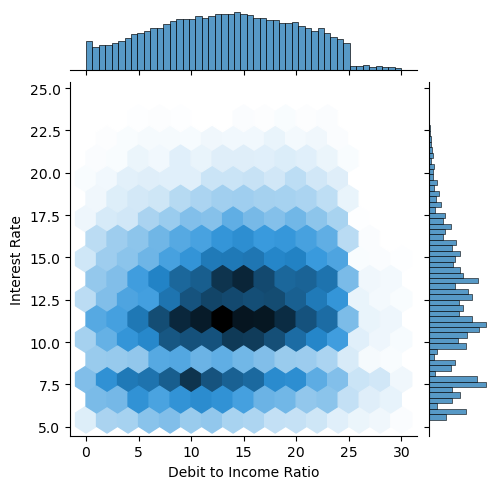

In [39]:
# Plot to analyse correlation between Interest Rate and Debit to Income Ratio (DTI)
plt.figure(figsize=(8,8))
sns.jointplot(data=loan_df,x='dti', y='int_rate',kind='hex',gridsize=15,height=5)
plt.xlabel('Debit to Income Ratio')
plt.ylabel('Interest Rate')
#plt.savefig('Bivariate_03.jpeg')
plt.show()

**Insights:**
* The concentration of <span style="color: blue;">loans in the 10-20 DTI range with 10-14% interest rates likely represents Lending Club's current "safe zone" for loan approvals</span>.
* However, the slight positive correlation between DTI and interest rate suggests that the company does factor higher DTI as a risk, albeit not as strongly as one might expect. 

###### Loan Amount vs other columns

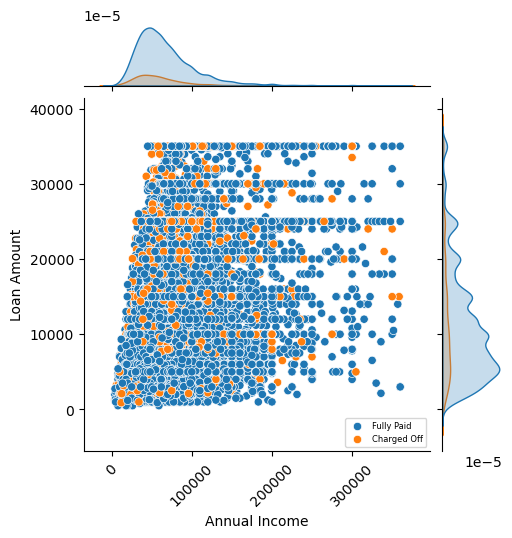

In [40]:
#Plot to analyse correlation between Loan Amount vs Annual Income by Loan Status
sns.jointplot(data=loan_df,x='annual_inc', y='loan_amnt',kind='scatter',hue='loan_status',height=5)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(loc='lower right',fontsize=6,title='')
plt.xticks(rotation=45)
#plt.savefig('Bivariate_04.jpeg')
plt.show()

**Insights:**
* In general, loans are issued to all income groups and all loan amounts.
* <span style="color: blue;">Majority were issued to borrowers with income around 50K dollars and for loan amount 5K dollars</span>.
* Higher charged off noticed in loans issued to low income borrowers.

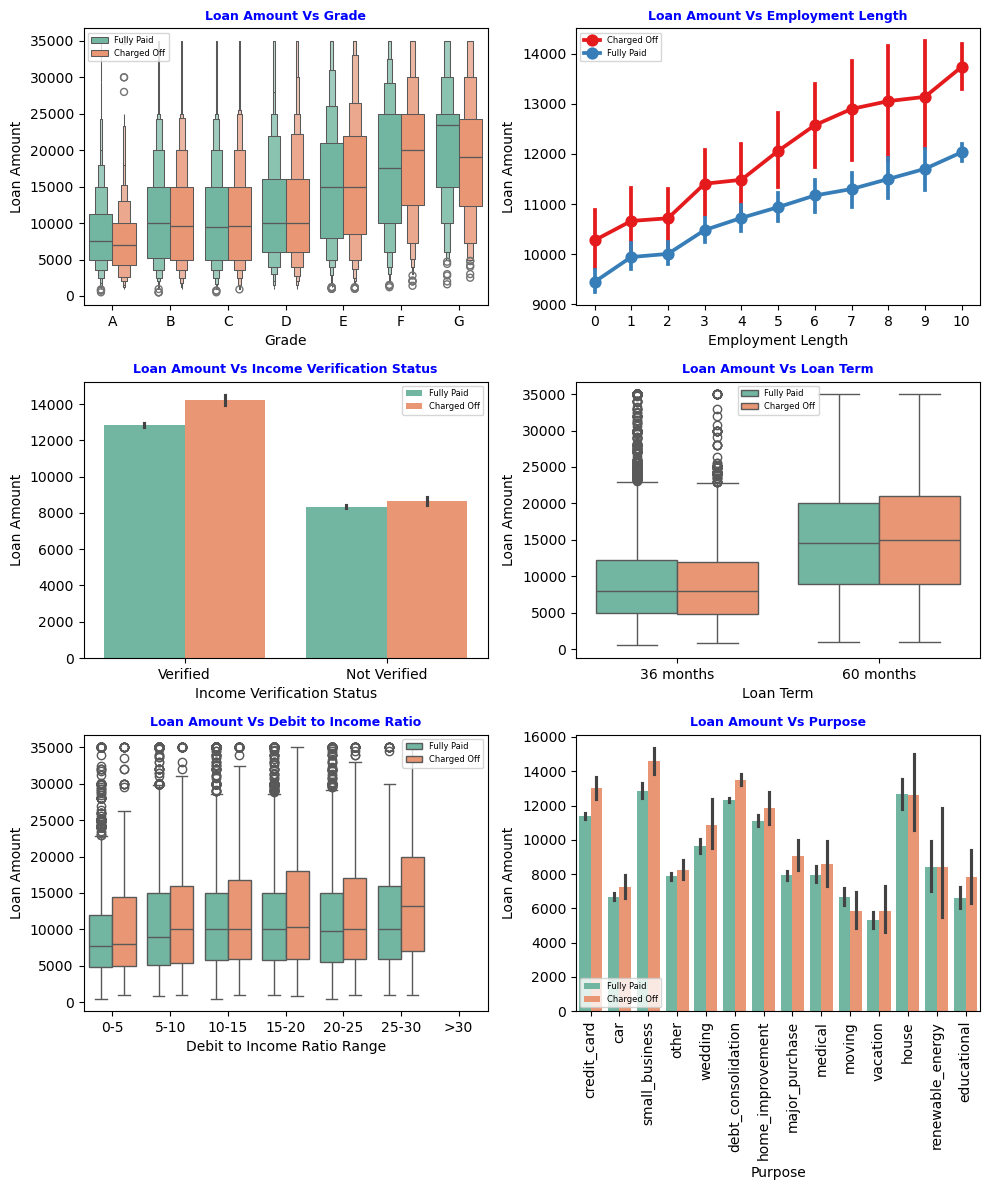

In [41]:
# Plot to analyse correlation between Loan amount and other columns by Loan Status
plt.figure(figsize=(10,12))

plt.subplot(321)
sns.boxenplot(data=loan_df,x='grade',y='loan_amnt',order=['A','B','C','D','E','F','G'],hue='loan_status',palette="Set2")
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.legend(loc='upper left',fontsize=6,title='')
plt.title("Loan Amount Vs Grade")

plt.subplot(322)
sns.pointplot(data=loan_df,x='emp_length',y='loan_amnt',hue='loan_status',palette="Set1")
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.legend(fontsize=6,title='')
plt.title("Loan Amount Vs Employment Length")

plt.subplot(323)
sns.barplot(data=loan_df,x='verification_status',y='loan_amnt',hue='loan_status',palette="Set2")
plt.xlabel('Income Verification Status')
plt.ylabel('Loan Amount')
plt.legend(fontsize=6,title='')
plt.title("Loan Amount Vs Income Verification Status")

plt.subplot(324)
sns.boxplot(data=loan_df,x='term',y='loan_amnt',hue='loan_status',palette="Set2")
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.legend(loc='upper center',fontsize=6,title='')
plt.title("Loan Amount Vs Loan Term")

plt.subplot(325)
sns.boxplot(data=loan_df,x='dti_range',y='loan_amnt',hue='loan_status',palette="Set2")
plt.xlabel('Debit to Income Ratio Range')
plt.ylabel('Loan Amount')
plt.legend(loc='upper right',fontsize=6,title='')
plt.title("Loan Amount Vs Debit to Income Ratio")

plt.subplot(326)
sns.barplot(data=loan_df,x='purpose',y='loan_amnt',hue='loan_status',palette="Set2")
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.legend(loc='lower left',fontsize=6,title='')
plt.title("Loan Amount Vs Purpose")
plt.xticks(rotation=90)

#plt.savefig('Bivariate_05.jpeg')
plt.tight_layout()
plt.show()

**Insights:**
* Loans with grades (E-G) generally have higher median and maximum loan amounts compared to loans with (A-C). This suggests lending club may be assigning grades based on loan amount. The distribution of loan amounts for both fully paid and charged-off <span style="color: blue;">indicates that loans under grade F have high risk of getting charged off especially higher amount loans</span>.
* There's a clear <span style="color: blue;">positive correlation between employment length and loan amount for both fully paid and charged-off loans, with charged-off loans consistently higher across all employment lengths</span>. 
* Verified incomes correspond to significantly higher loan amounts for both fully paid and charged-off loans. However, the gap between verified and non-verified amounts is larger for charged-off loans, indicating a higher risk associated with larger loans to verified borrowers. This <span style="color: blue;">counterintuitive result suggests that income verification alone may not be sufficient for assessing repayment capability</span>. 
* 60-month loans generally have higher loan amounts across all quartiles compared to 36-month loans, indicating borrowers prefer longer terms for larger loans, likely to reduce monthly payments. <span style="color: blue;">The higher upper quartile for charged-off 60-month loans is particularly noteworthy, indicating that a significant portion of larger long-term loans are at higher risk of default</span>. 
* The graph shows a slight increase in loan amounts as DTI increases, with charged-off loans generally having higher amounts across all DTI ranges.
* <span style="color: blue;">Small business loans stand out with the highest average amounts and the largest gap between fully paid and charged-off loans. Debt consolidation, house and credit card refinancing also show high loan amounts</span>. The higher default rates for small business loans highlight the inherent risks in business ventures. For debt consolidation and credit card refinancing, the high amounts might indicate borrowers attempting to manage existing high debt loads, which carries its own risks. 

###### Analyse 'All Loans Vs Charged Off Loans' for key data columns

In [42]:
# Function to count plot for all loans and bar plot for % of Charged Off loans by data column passed
def plotbyloanstatus(grpbycol,friendlytext,sortaxes=False,printtable=False):
    plt.figure(figsize=(15,4))
   
    plt.subplot(121)
    if sortaxes:
      ax = sns.countplot(x=grpbycol, data=loan_df,hue='loan_status',order=sorted(loan_df[grpbycol].unique()),palette="hls")
    else:
      ax = sns.countplot(x=grpbycol, data=loan_df,hue='loan_status',palette="hls")
    ax.set_ylabel('Count of All Loans')
    ax.set_xlabel(friendlytext)
    plt.xticks(fontsize=8,rotation=90)
    plt.title("All Loans by " + friendlytext)

    grpcount = pd.pivot_table(data=loan_df,index='loan_status',columns=grpbycol,values='funded_amnt',aggfunc='count',fill_value=0).astype(int)
    grpper = (grpcount.loc['Charged Off']/grpcount.sum(axis=0)) * 100

    plt.subplot(122)
    ax = grpper.plot.bar(color=sns.color_palette("hls",10))
    ax.set_ylabel('% of Charged Off Loans')
    ax.set_xlabel(friendlytext)
    plt.xticks(fontsize=8,rotation=90)
    plt.title("Charged Off Loans by " + friendlytext)

    #plt.savefig('Bivariate_' + grpbycol + '.jpeg')
    plt.tight_layout()
    plt.show()
    
    if printtable:
        print(grpcount)

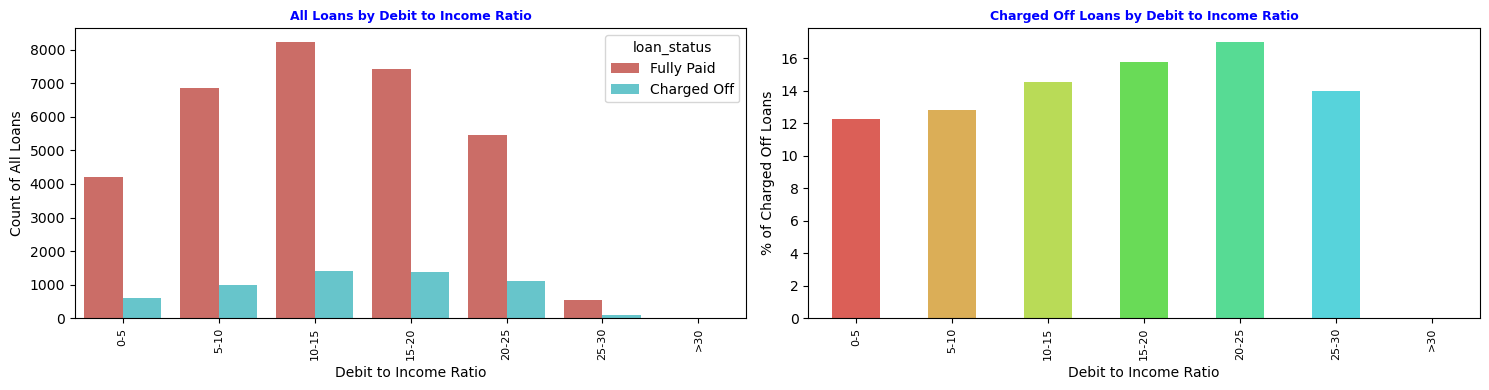

In [43]:
plotbyloanstatus('dti_range','Debit to Income Ratio')

**Insights**
* While most loans cluster in the 11-20% DTI range,the <span style="color: blue;">percentage of loans charged off significantly increases as the DTI ratio climbs</span>, peaking distinctly in the 21-25% range where over 16% of the loans end up charged off. This peak suggests a critical threshold for default risk, indicating that borrowers within this DTI range are the most susceptible to financial distress leading to defaults. 

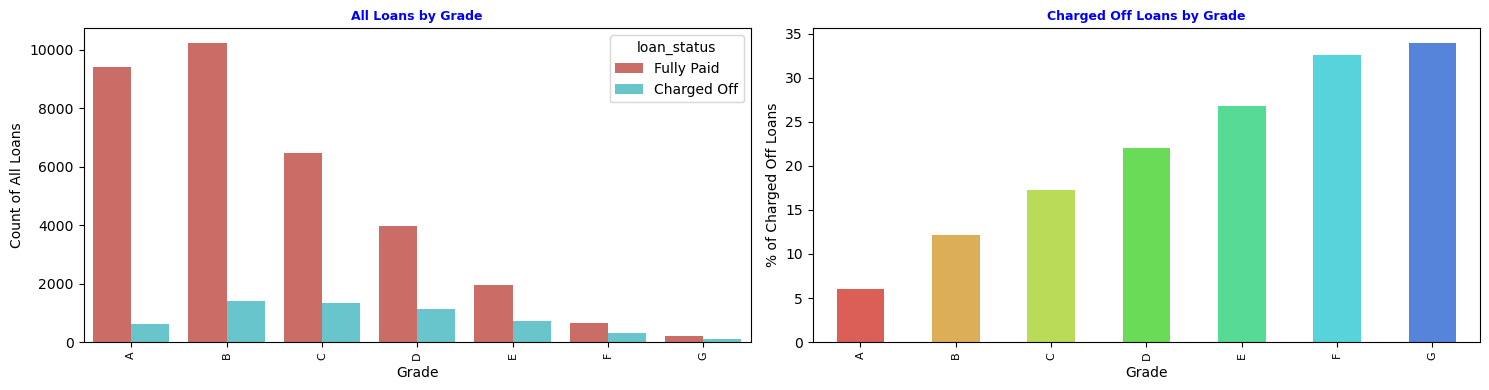

In [44]:
plotbyloanstatus('grade','Grade',True)

**Insights**
* While the majority of loans are concentrated in grades A and B, <span style="color: blue;">the percentage of charged-off loans increases progressively from grade A through G</span>. Notably, grades A & B show significantly fewer defaults, while risk escalates dramatically from grade E onwards, peaking at grade G. 

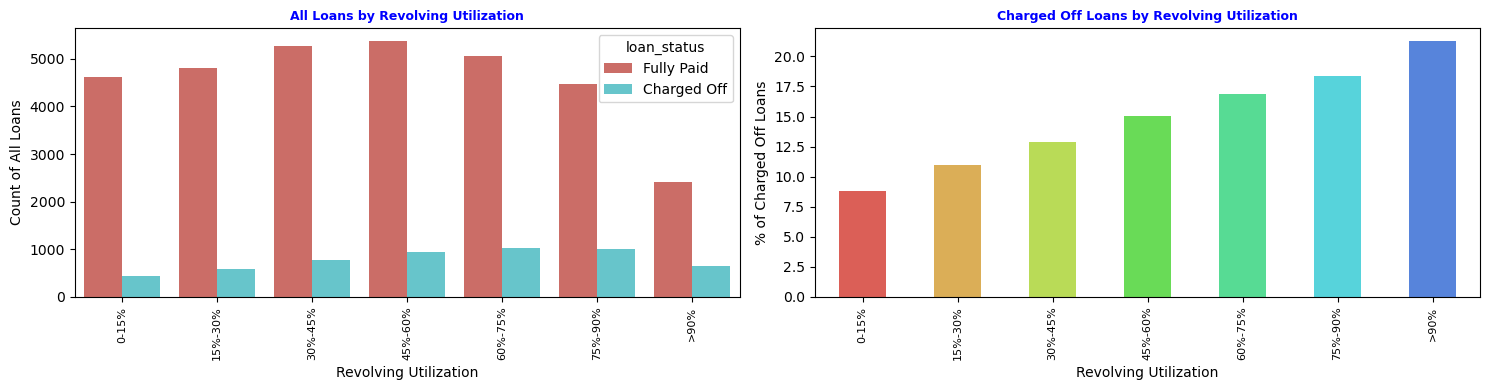

In [45]:
plotbyloanstatus('revol_util_range','Revolving Utilization')

**Insights**
* Loan issuance across different levels of revolving utilization at Lending Club is relatively consistent up to 90%, with a noticeable decline in loans for those utilizing 75-90% of their credit. This pattern suggests that while Lending Club aims to serve a broad customer base without heavily basing loan approvals on credit utilization alone, there is increased caution towards borrowers with higher utilization, possibly due to associated financial risks.
* <span style="color: blue;">The percentage of charged-off loans increases significantly as revolving utilization grows</span>, particularly evident for borrowers utilizing more than 75% of their available credit, with the highest default rates observed in those utilizing more than 90%. This trend highlights a clear risk factor: borrowers with high credit utilization are more likely to default, possibly due to overextension in their financial commitments and lower resilience against economic shocks. 

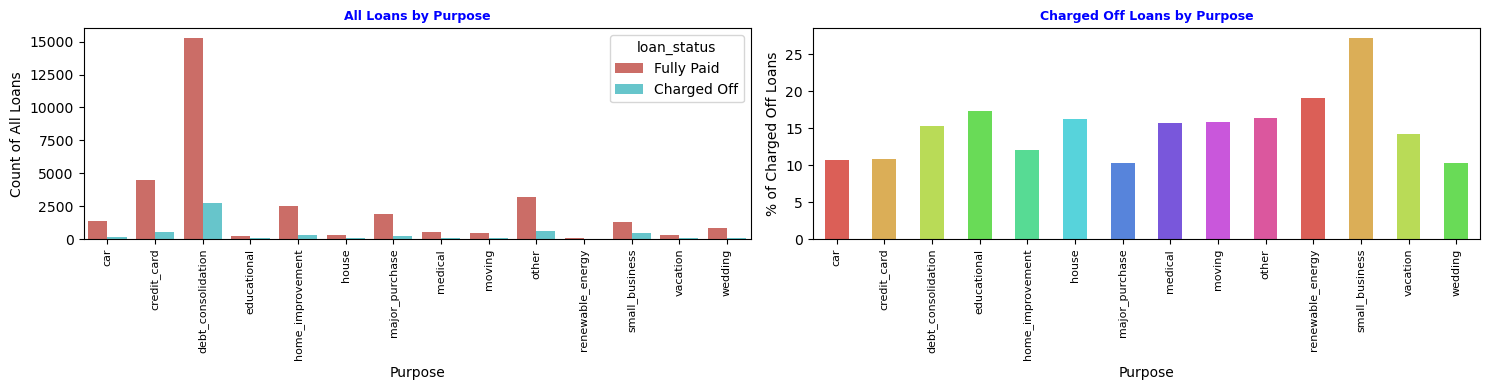

In [46]:
plotbyloanstatus('purpose','Purpose',True)

**Insights**
* While 'Debt consolidation' leads in loan purposes, <span style="color: blue;">loans issued for 'Small business' have the highest charge-off rates (27%)</span>, reflecting the inherent risks associated with starting new businesses. Similarly, loans for 'renewable energy', 'education', and 'house' also display elevated charge-off rates, indicating the speculative nature of renewable investments, the non-income-generating aspect of education, and the substantial financial commitments required for housing. 

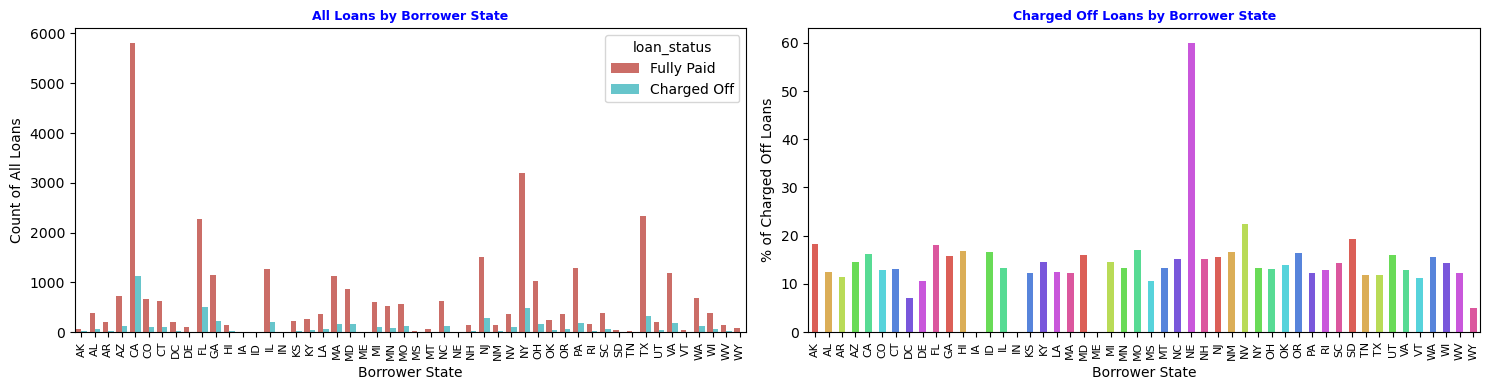

addr_state   AK   AL   AR   AZ    CA   CO   CT   DC   DE    FL    GA   HI  IA  \
loan_status                                                                     
Charged Off  14   54   27  122  1124   98   94   15   12   499   215   28   0   
Fully Paid   63  379  208  722  5813  664  628  196  101  2270  1142  138   5   

addr_state   ID    IL  IN   KS   KY   LA    MA   MD  ME   MI   MN   MO  MS  \
loan_status                                                                  
Charged Off   1   197   0   31   45   53   159  162   0  102   81  114   2   
Fully Paid    5  1274   9  224  266  369  1134  857   3  601  524  555  17   

addr_state   MT   NC  NE   NH    NJ   NM   NV    NY    OH   OK   OR    PA  \
loan_status                                                                 
Charged Off  11  114   3   25   278   30  107   493   154   40   71   179   
Fully Paid   72  634   2  141  1506  151  370  3191  1023  247  364  1286   

addr_state    RI   SC  SD  TN    TX   UT    VA  VT   

In [47]:
plotbyloanstatus('addr_state','Borrower State',True,True)

**Insights**
* The distribution of all loans by borrower state shows California (CA) leading significantly in loan volume, followed by states like New York (NY) and Texas (TX). This distribution could be influenced by the larger populations and potentially higher economic activity in these states. For Lending Club, understanding regional economic conditions and consumer behavior patterns in these areas could be crucial. 
* <span style="color: blue;">The percentage of charged-off loans by state reveals that some states, like Nebraska (NE), Nevada (NV) and Florida (FL), have higher rates of loan defaults compared to others</span>. This variation could be reflective of local economic conditions, such as unemployment rates, cost of living, or regional financial crises (e.g., the housing market crash affecting Florida significantly). For Lending Club, this insight could lead to more nuanced risk assessments where regional economic factors are integrated into the lending algorithms. Enhancing credit evaluation processes by including state-specific economic data could potentially reduce default rates and improve portfolio performance.

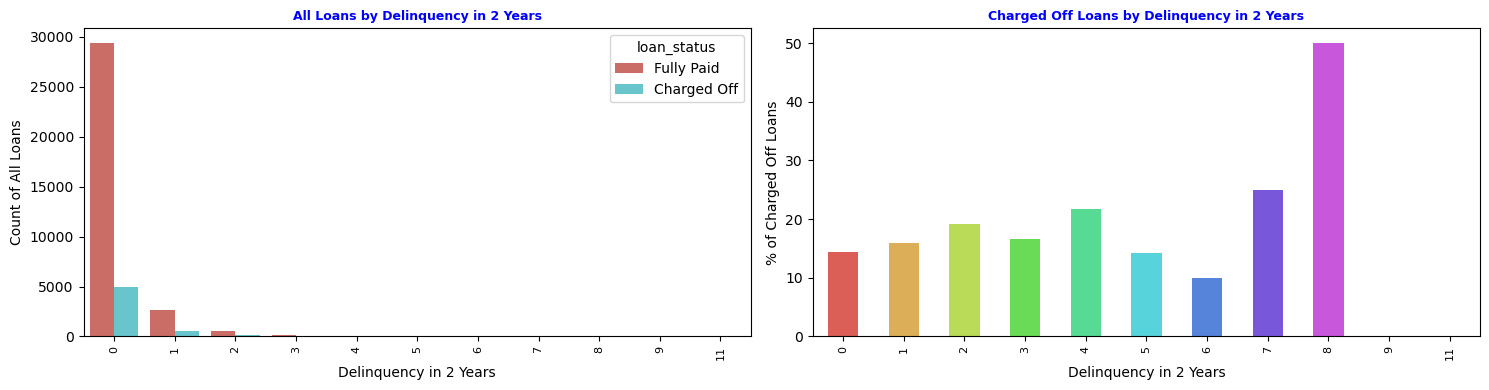

delinq_2yrs     0     1    2    3   4   5   6   7   8   9   11
loan_status                                                   
Charged Off   4923   506  129   35  13   3   1   1   1   0   0
Fully Paid   29367  2687  542  176  47  18   9   3   1   1   1


In [48]:
plotbyloanstatus('delinq_2yrs','Delinquency in 2 Years',True,True)

**Insights**
* The distribution of all loans by delinquency status within two years at Lending Club shows that the vast majority of loans are issued to borrowers with no delinquencies, indicating a conservative lending approach that prioritizes creditworthiness. A small fraction of the loans are granted to individuals with one or more delinquencies, with numbers sharply decreasing as delinquencies increase. This cautious strategy likely helps minimize the risk of default, aligning with Lending Club's objective to maintain loan quality and reduce financial losses.
* The pattern of charged-off loans by <span style="color: blue;">delinquency within two years demonstrates that higher delinquencies correlate with increased charge-off rates, peaking at eight delinquencies where the loans charged off reach 50%</span>. However, it's crucial to note the significantly smaller sample size for loans with higher delinquencies, with only one or two loans represented in the highest delinquency categories. This sparse data could potentially skew the perceived risk at these higher levels, suggesting that while there is a clear trend of increasing charge-offs with more delinquencies, the exact risk level at extreme delinquencies may not be as high or as accurately represented due to the limited data. 

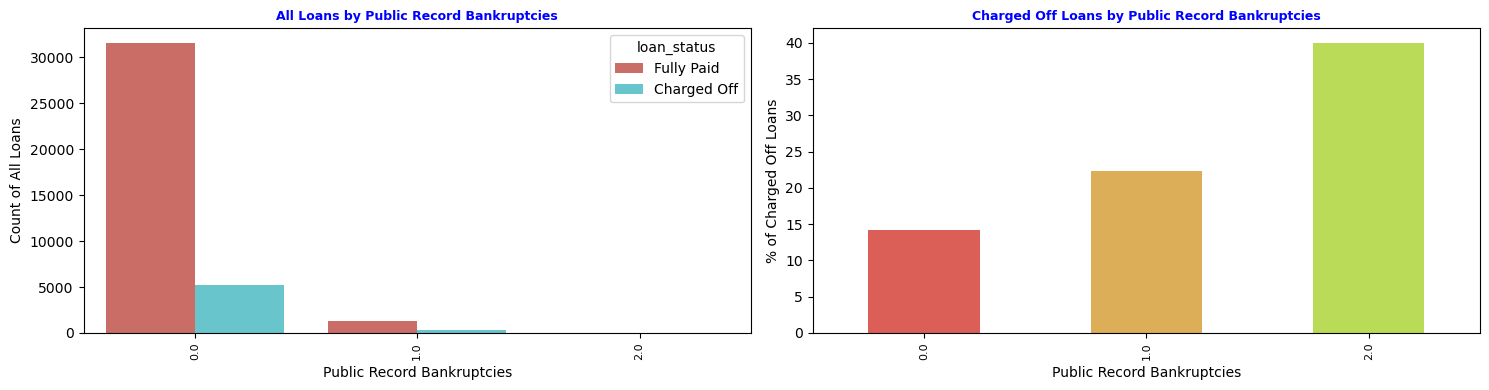

pub_rec_bankruptcies   0.00  1.00  2.00
loan_status                            
Charged Off            5244   366     2
Fully Paid            31581  1268     3


In [49]:
plotbyloanstatus('pub_rec_bankruptcies','Public Record Bankruptcies',True,True)

Analysis of All Loans by Public Record Bankruptcies:
* The distribution of loans by public record bankruptcies shows a vast majority of Lending Club’s loans are issued to borrowers with no bankruptcy records. Loans to borrowers with one or more bankruptcy records represent a tiny fraction of the portfolio, which aligns with typical lending practices to minimize risk exposure.
* <span style="color: blue;">The percentage of charged-off loans increases with the number of public record bankruptcies, from 14.24% with no bankruptcies to 40.00% with two bankruptcies</span>. This trend underscores the heightened risk associated with lending to individuals with prior bankruptcies. 

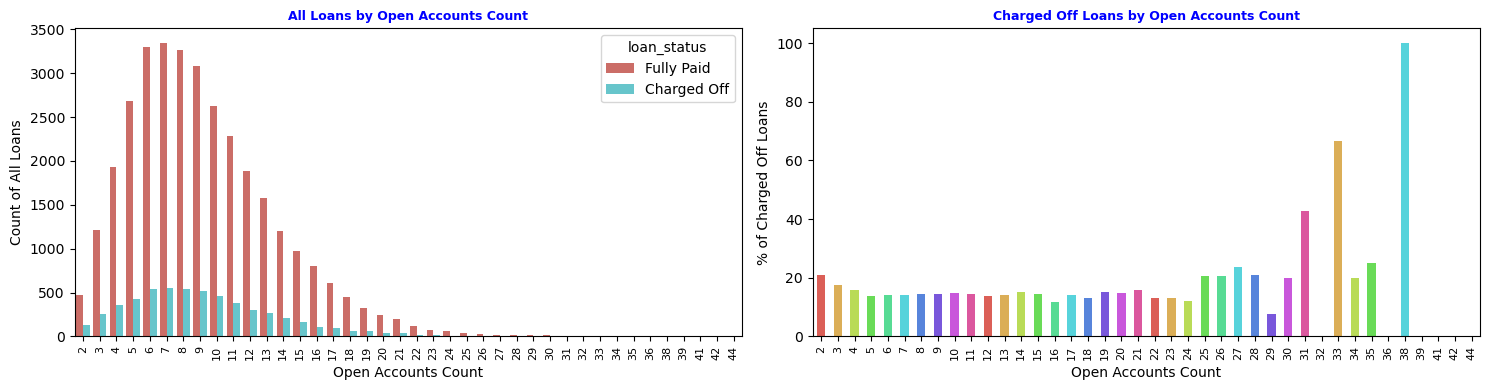

open_acc      2     3     4     5     6     7     8     9     10    11    12  \
loan_status                                                                    
Charged Off  125   257   364   424   543   557   545   517   462   382   300   
Fully Paid   468  1210  1932  2681  3294  3343  3259  3082  2622  2278  1889   

open_acc       13    14   15   16   17   18   19   20   21   22  23  24  25  \
loan_status                                                                   
Charged Off   263   216  167  105  101   68   58   42   37   18  12   9  11   
Fully Paid   1583  1207  976  801  610  445  322  239  198  119  79  66  42   

open_acc     26  27  28  29  30  31  32  33  34  35  36  38  39  41  42  44  
loan_status                                                                  
Charged Off   7   5   5   1   3   3   0   2   1   1   0   1   0   0   0   0  
Fully Paid   27  16  19  12  12   4   3   1   4   3   2   0   1   1   1   1  


In [50]:
plotbyloanstatus('open_acc','Open Accounts Count',True,True)

**Insights**
* Loan Volume by State: The distribution of loans by state shows California (CA) leading in volume, followed by New York (NY) and Texas (TX). These states reflect high economic activity and population, which influences the loan distribution. Understanding these factors is crucial for Lending Club to tailor its services effectively.
* <span style="color: blue;">The percentage of charged-off loans varies notably by state. While Nebraska (NE) shows the highest default rate at 60%, the extremely low volume of only 5 loans requires cautious interpretation. Following NE, the states with the highest default rates and more substantial data are Nevada (NV) at 22.43% with 477 loans, South Dakota (SD) at 19.35% with 62 loans, Alaska (AK) at 18.18% with 77 loans, and Florida (FL) at 18.02% with 2769 loans.</span> These figures suggest that, aside from NE, NV, SD, AK, and FL represent significant risk profiles with sufficient data to consider them reliable indicators of default risk. This analysis underscores the necessity of integrating state-specific economic conditions and lending patterns into Lending Club’s risk management strategies to mitigate potential defaults effectively.

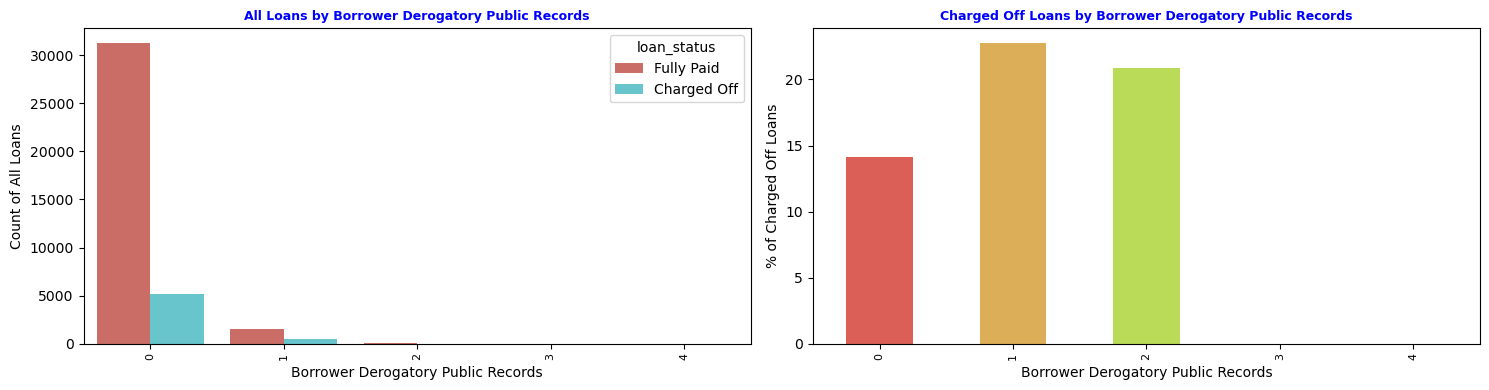

pub_rec          0     1   2  3  4
loan_status                       
Charged Off   5145   457  10  0  0
Fully Paid   31252  1553  38  7  2


In [51]:
plotbyloanstatus('pub_rec','Borrower Derogatory Public Records',True,True)

**Insights**
* The distribution of all loans by the number of derogatory public records shows that the vast majority of borrowers have no derogatory records, with a steep drop-off for those with one or more records. This pattern indicates that Lending Club largely serves individuals with clean financial histories, which aligns with a conservative risk strategy. The presence of any derogatory records likely flags potential risk, reducing the likelihood of loan approval.
* <span style="color: blue;">Charged-off rates increase with the presence of derogatory public records, particularly noticeable for borrowers with one record, reflecting a 22.74% charge-off rate compared to 14.14% for those with none</span>. This suggests that any past financial missteps significantly raise the risk of default. The rate doesn't consistently increase with more than one record, possibly due to small sample sizes, but the trend underscores the importance of these records in assessing borrower risk.

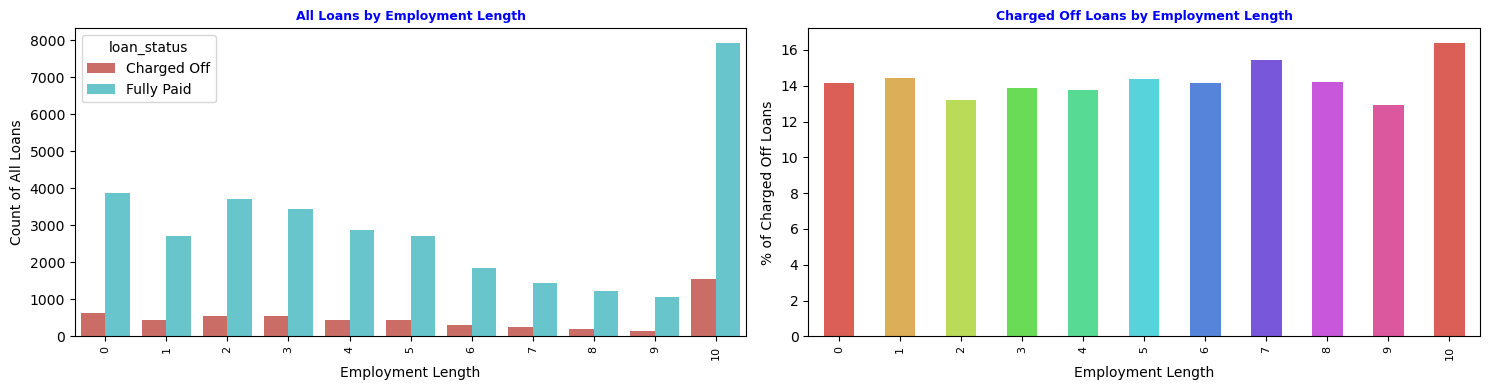

In [52]:
plotbyloanstatus('emp_length','Employment Length',True)

**Insights**
* Loan volume significantly increases for borrowers with 10+ years of employment, suggesting a preference for experienced applicants.
* Fully paid loans consistently outnumber charged-off loans across all employment lengths by a great extent.
* <span style="color: blue;">Percentage of charged-off loans shows a slight variation, indicating that employment length alone may not be a strong predictor of default risk</span>.

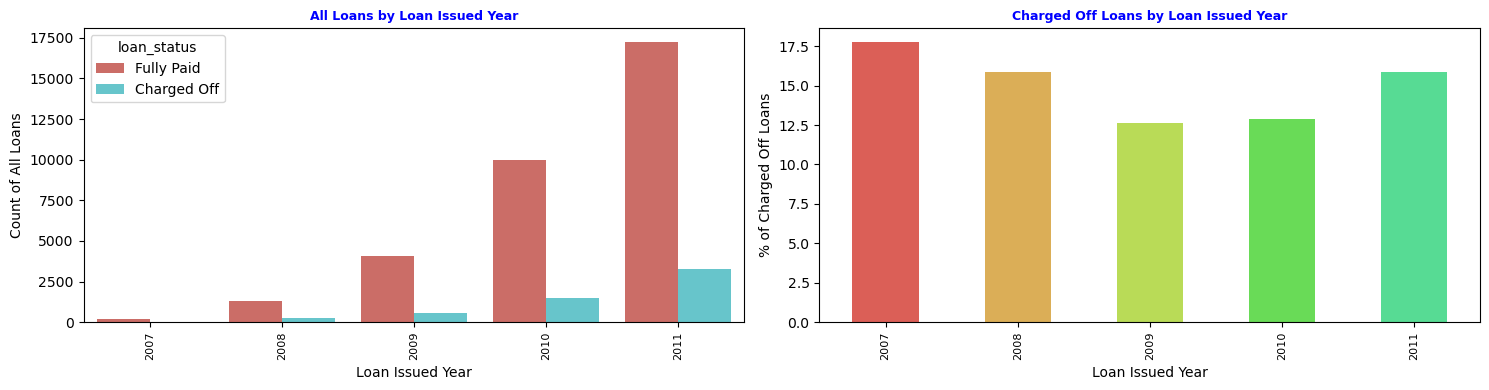

loan_year    2007  2008  2009   2010   2011
loan_status                                
Charged Off    44   247   593   1477   3251
Fully Paid    204  1310  4105  10010  17223


In [53]:
plotbyloanstatus('loan_year','Loan Issued Year',True,True)

**Insights**
* The graph showcases a steep rise in the total number of loans issued from 2007 to 2011, illustrating the platform's rapid growth and increased adoption over these years. The sharp increase particularly from 2009 to 2011 highlights the expanding trust and reach of the platform among borrowers. 
* <span style="color: blue;">The percentage of charged-off loans started relatively higher in 2007 at 17.74% but trended downwards in the subsequent years until 2010, indicating an improvement in Lending Club’s credit risk management. However, there is a slight uptick in 2011 to 15.88%, potentially due to the effects of rapid growth on loan quality or external economic factors, reflecting the complex dynamics between loan growth and loan quality management</span>.

###### Correlation between all numerical data columns

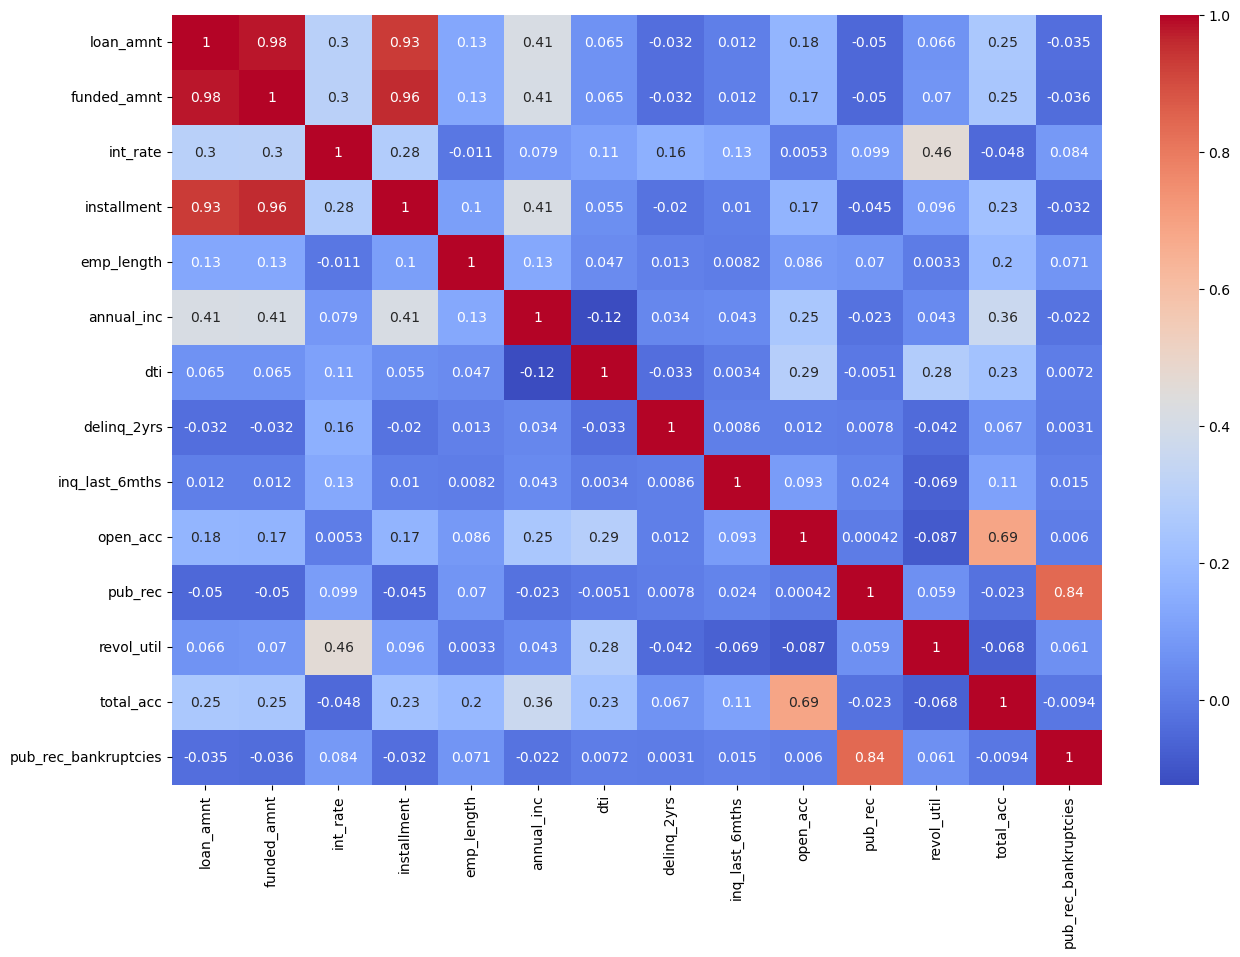

In [54]:
# Final heatmap between numerical data
plt.figure(figsize=(15,10))
sns.heatmap(loan_df[numcols].corr(),annot=True,cmap="coolwarm")
#plt.savefig('Heatmap.jpeg')
plt.show()


**Insights**
* Loan amount is correlated highly with Annual Income, moderately with total accounts
* Interest rate in correlated highly with Revolving Utilization.
* Interest rate is moderately with loan amount and slightly with delinquency count in 2 years, Inquires in 6 months and DTI (Debit to Income)
* As expected,
    * Public derogatory records highly correlated with public records
    * Installment is highly correlated to Loan amount
    * Annual Income is correlated with employment length

<a name="conclusions"></a>
## Conclusions

* Loan Purpose: Debt consolidation and credit card payoff are the most common purposes, indicating a prevalent use of these loans for managing existing debt.
* Seasonal Trends: There is a clear seasonal pattern in loan issuance, peaking in December, which may reflect borrowers' financial planning trends at year-end.
* Income Verification and Default Rates: The status of income verification does not consistently correlate with lower default rates, suggesting that it should not be overly relied upon, especially for larger loans.
* Account Number Risks: The number of open accounts presents a U-shaped risk profile, where very low and very high counts are associated with increased default risks, highlighting the complexity of financial management among borrowers with extreme numbers of credit lines.


**Loans with below criteria are highly contributing to charged off:**
* Loans with higher interest rate (>12%)
* Loans with grade 'F' and loan amount > 20K
* Higher amount loans (>13K) for small business, debt consolidation or credit card
* Borrower Debit to income ratio > 25% and loan amount > 15K
* Borrower revolving utilization > 60%
* Loans from states like AK, FL, NE, NV, SD
* Delinquency in 2 years > 2
* Borrower derogatory public records > 0
* Borrower annual income <50K and loan amount > 5K

## Recommendations
1. Implement Risk-Based Pricing: Develop a nuanced interest rate model that reflects diverse risk factors including DTI, credit utilization, and loan purpose, ensuring rates are commensurate with potential risks.
2. Geographic Risk Management: Establish tailored lending criteria for different regions, especially in states with historically higher default rates, to mitigate location-based risks.
3. Specialized Debt Consolidation Programs: Offer tailored financial products for debt consolidation with accompanying advisory services to help borrowers manage their debts more effectively.
4. Enhance Employment Length Evaluation: Balance the emphasis on employment length with comprehensive assessments of financial health to avoid over-prioritizing tenure over actual ability to repay.
5. Credit Utilization Strategy: Tighten approval criteria for borrowers with high credit utilization rates (>60%), recognizing this as a significant predictor of potential default.
6. Seasonal Lending Adjustments: Plan for seasonal fluctuations in loan demand, optimizing capital allocation and marketing strategies to match the observed end-of-year surge in borrowing.
7. Stringent Criteria for Small Business Loans: Increase scrutiny of small business loan applications, possibly requiring detailed business assessments or additional security to offset the higher observed risk.
8. Conservative Approach to Derogatory Records: Maintain stringent lending standards for applicants with derogatory public records or bankruptcies, potentially requiring additional assurances such as guarantors or collateral.
9. Stricter DTI Thresholds: Enforce more rigorous reviews for loans where the DTI exceeds 20-25%, identifying this range as a critical risk threshold.
10. Refined Credit History Assessment: Employ a detailed approach to credit history evaluation, wary of borrowers at the extremes of credit account numbers.
11. Robust Income Verification: Strengthen the income verification process, especially for larger loan amounts, to ensure that reported incomes are accurate and reliable.
12. Adjust Loan Terms Based on Amount: Tailor the terms of loans, particularly the maximum amount and duration, to better manage the risk profile of longer-term, larger loans.

<a name="acknowledgements"></a>
## Acknowledgements


* Thanks to the instructors from UpGrad and IIITB for guidance and feedback.

**Study Group Members**
* Somasekhar Gangarapu
* Ursina Sanderink
